# **Neural Network and Deep Learning Project**
## **Sign Language to Text Translation Using Deep Learning**
## Dataset: [Sign Language MNIST Dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)
## **Group 2**
* Aisha Gbadamosi-Opoola
* Alex Juma
* Francis Yumul
* Yanna Polonia

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, multilabel_confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.applications import DenseNet121, ResNet50, VGG16
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import pandas as pd
import numpy as np
import seaborn as sns

# **1. Data Steps**

## Loading Sign Language MNIST train and test dataset

In [ ]:
train_data = pd.read_csv('sign_mnist_train.csv')
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [ ]:
test_data = pd.read_csv('sign_mnist_test.csv')
test_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


### <span style='color:blue'>The data is given in the form of label and pixel values, this last ones ranging from pixel 1 to pixel 784, suggesting we have 28 * 28 image.</span>

## Verifying for missing values

In [ ]:
# Validating if there are any missing values in train_data
train_data.isnull().sum().any()

False

In [ ]:
# Validating if there are any missing values in test_data
test_data.isnull().sum().any()

False

### <span style='color:blue'>Based on previous results we don't have any missing values in our data</span>

## Separating labels from features (pixels) in each set

In [ ]:
train_labels = train_data['label']
train_labels

,label
0,3
1,6
2,2
3,2
4,13
...,...
27450,13
27451,23
27452,18
27453,17


In [ ]:
test_labels = test_data['label']
test_labels

,label
0,6
1,5
2,10
3,0
4,3
...,...
7167,1
7168,12
7169,2
7170,4


In [ ]:
# Dropping label feature and keeping the remaining features
train_pixels = train_data.drop(['label'], axis = 1)
train_pixels.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
# Dropping label feature and keeping the remaining features
test_pixels = test_data.drop(['label'], axis = 1)
test_pixels.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


## Exploring data labels (signs) distribution

In [ ]:
# Obtaining uniques values per ecah class and their count, for training dataset
train_unique_labels, train_labels_count = np.unique(train_labels, return_counts = True)

# Converting into a DataFrame for nicer later print
labels = pd.DataFrame(train_unique_labels, columns = ['Label'])
labels = labels.join(pd.DataFrame(train_labels_count, columns = ['Count']))
labels

,Label,Count
0,0,1126
1,1,1010
2,2,1144
3,3,1196
4,4,957
5,5,1204
6,6,1090
7,7,1013
8,8,1162
9,10,1114


In [ ]:
# Obtaining uniques values per ecah class and their count, for test dataset
test_unique_labels, test_labels_count = np.unique(test_labels, return_counts = True)

# Converting into a DataFrame for nicer later print
y_test = pd.DataFrame(test_labels_count, columns = ['Count'])

# Storing the train and test dataset classess and counts in data
labels['Count'] = labels['Count'] + y_test['Count']
labels

,Label,Count
0,0,1457
1,1,1442
2,2,1454
3,3,1441
4,4,1455
5,5,1451
6,6,1438
7,7,1449
8,8,1450
9,10,1445


### <span style='color:blue'>We have 24 unique labels, numbered from 0 to 24 skipping label 9</span>

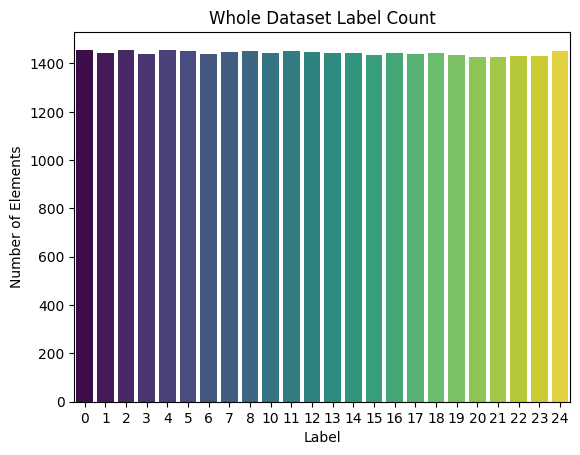

In [ ]:
plot = sns.barplot(data = labels, x = "Label", y = "Count", hue = "Label", palette = 'viridis', legend = False)
plt.xlabel('Label')
plt.ylabel('Number of Elements')
plt.title('Whole Dataset Label Count')
plt.show()

### <span style='color:blue'>We can conclude that we have a balanced distribution, because each label is basically equally distributed within the dataset. Another thing we could observed is that our classes range from 0 to 24 but skipping label 9.</span>

In [ ]:
def remap_labels(original_labels):
    """Creates a new list to store the remapped labels, shiftting those values that are higher than 9"""
    remapped_labels = []
    for label in original_labels:
        if label > 9:
          remapped_labels.append(label - 1)  # Shiftting labels > 9 down by 1
        else:
          remapped_labels.append(label)  # No shift needed for labels <= 9

    return remapped_labels

train_labels = remap_labels(train_labels)
test_labels = remap_labels(test_labels)

In [ ]:
# Printing train_labels after remapping process
print(np.unique(train_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [ ]:
# Printing test_labels after remapping process
print(np.unique(test_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


## Displaying the first ten images using the 'gray' colour map in train_pixels

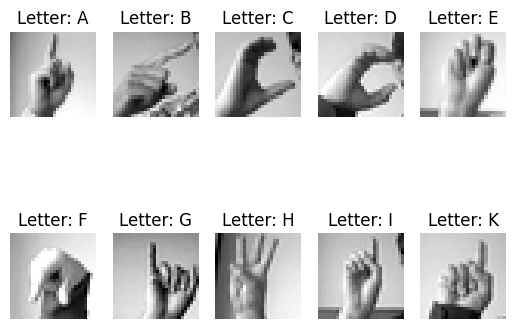

In [ ]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 row, 5 columns, current image index
    plt.imshow(train_pixels.values[i].reshape(28, 28), cmap='gray')  # Reshaping and displaying the image
    plt.title(f'Letter: {letters[i]}')
    plt.axis('off')  # Turning off axis

plt.show()  # Don't forget to show the plot

In [ ]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(train_labels)
y_test = label_binarizer.fit_transform(test_labels)

## Splitting test_data, to have a test and a validation set

In [ ]:
# Keeping 50% of the original test data as a test set and the remaining 50% kept as validation set
test_pixels, val_pixels, test_labels, val_labels = train_test_split(test_pixels, y_test, test_size = 0.5)
print(f'Test Set Size: {len(test_pixels)}\nValidation Set Size: {len(val_pixels)}')

Test Set Size: 3586
Validation Set Size: 3586


## Using seaborn.heatmap to display the correlation matrix of the features

In [ ]:
# Combining all the pixels sets into one
pixels_data = train_pixels + test_pixels + val_pixels

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


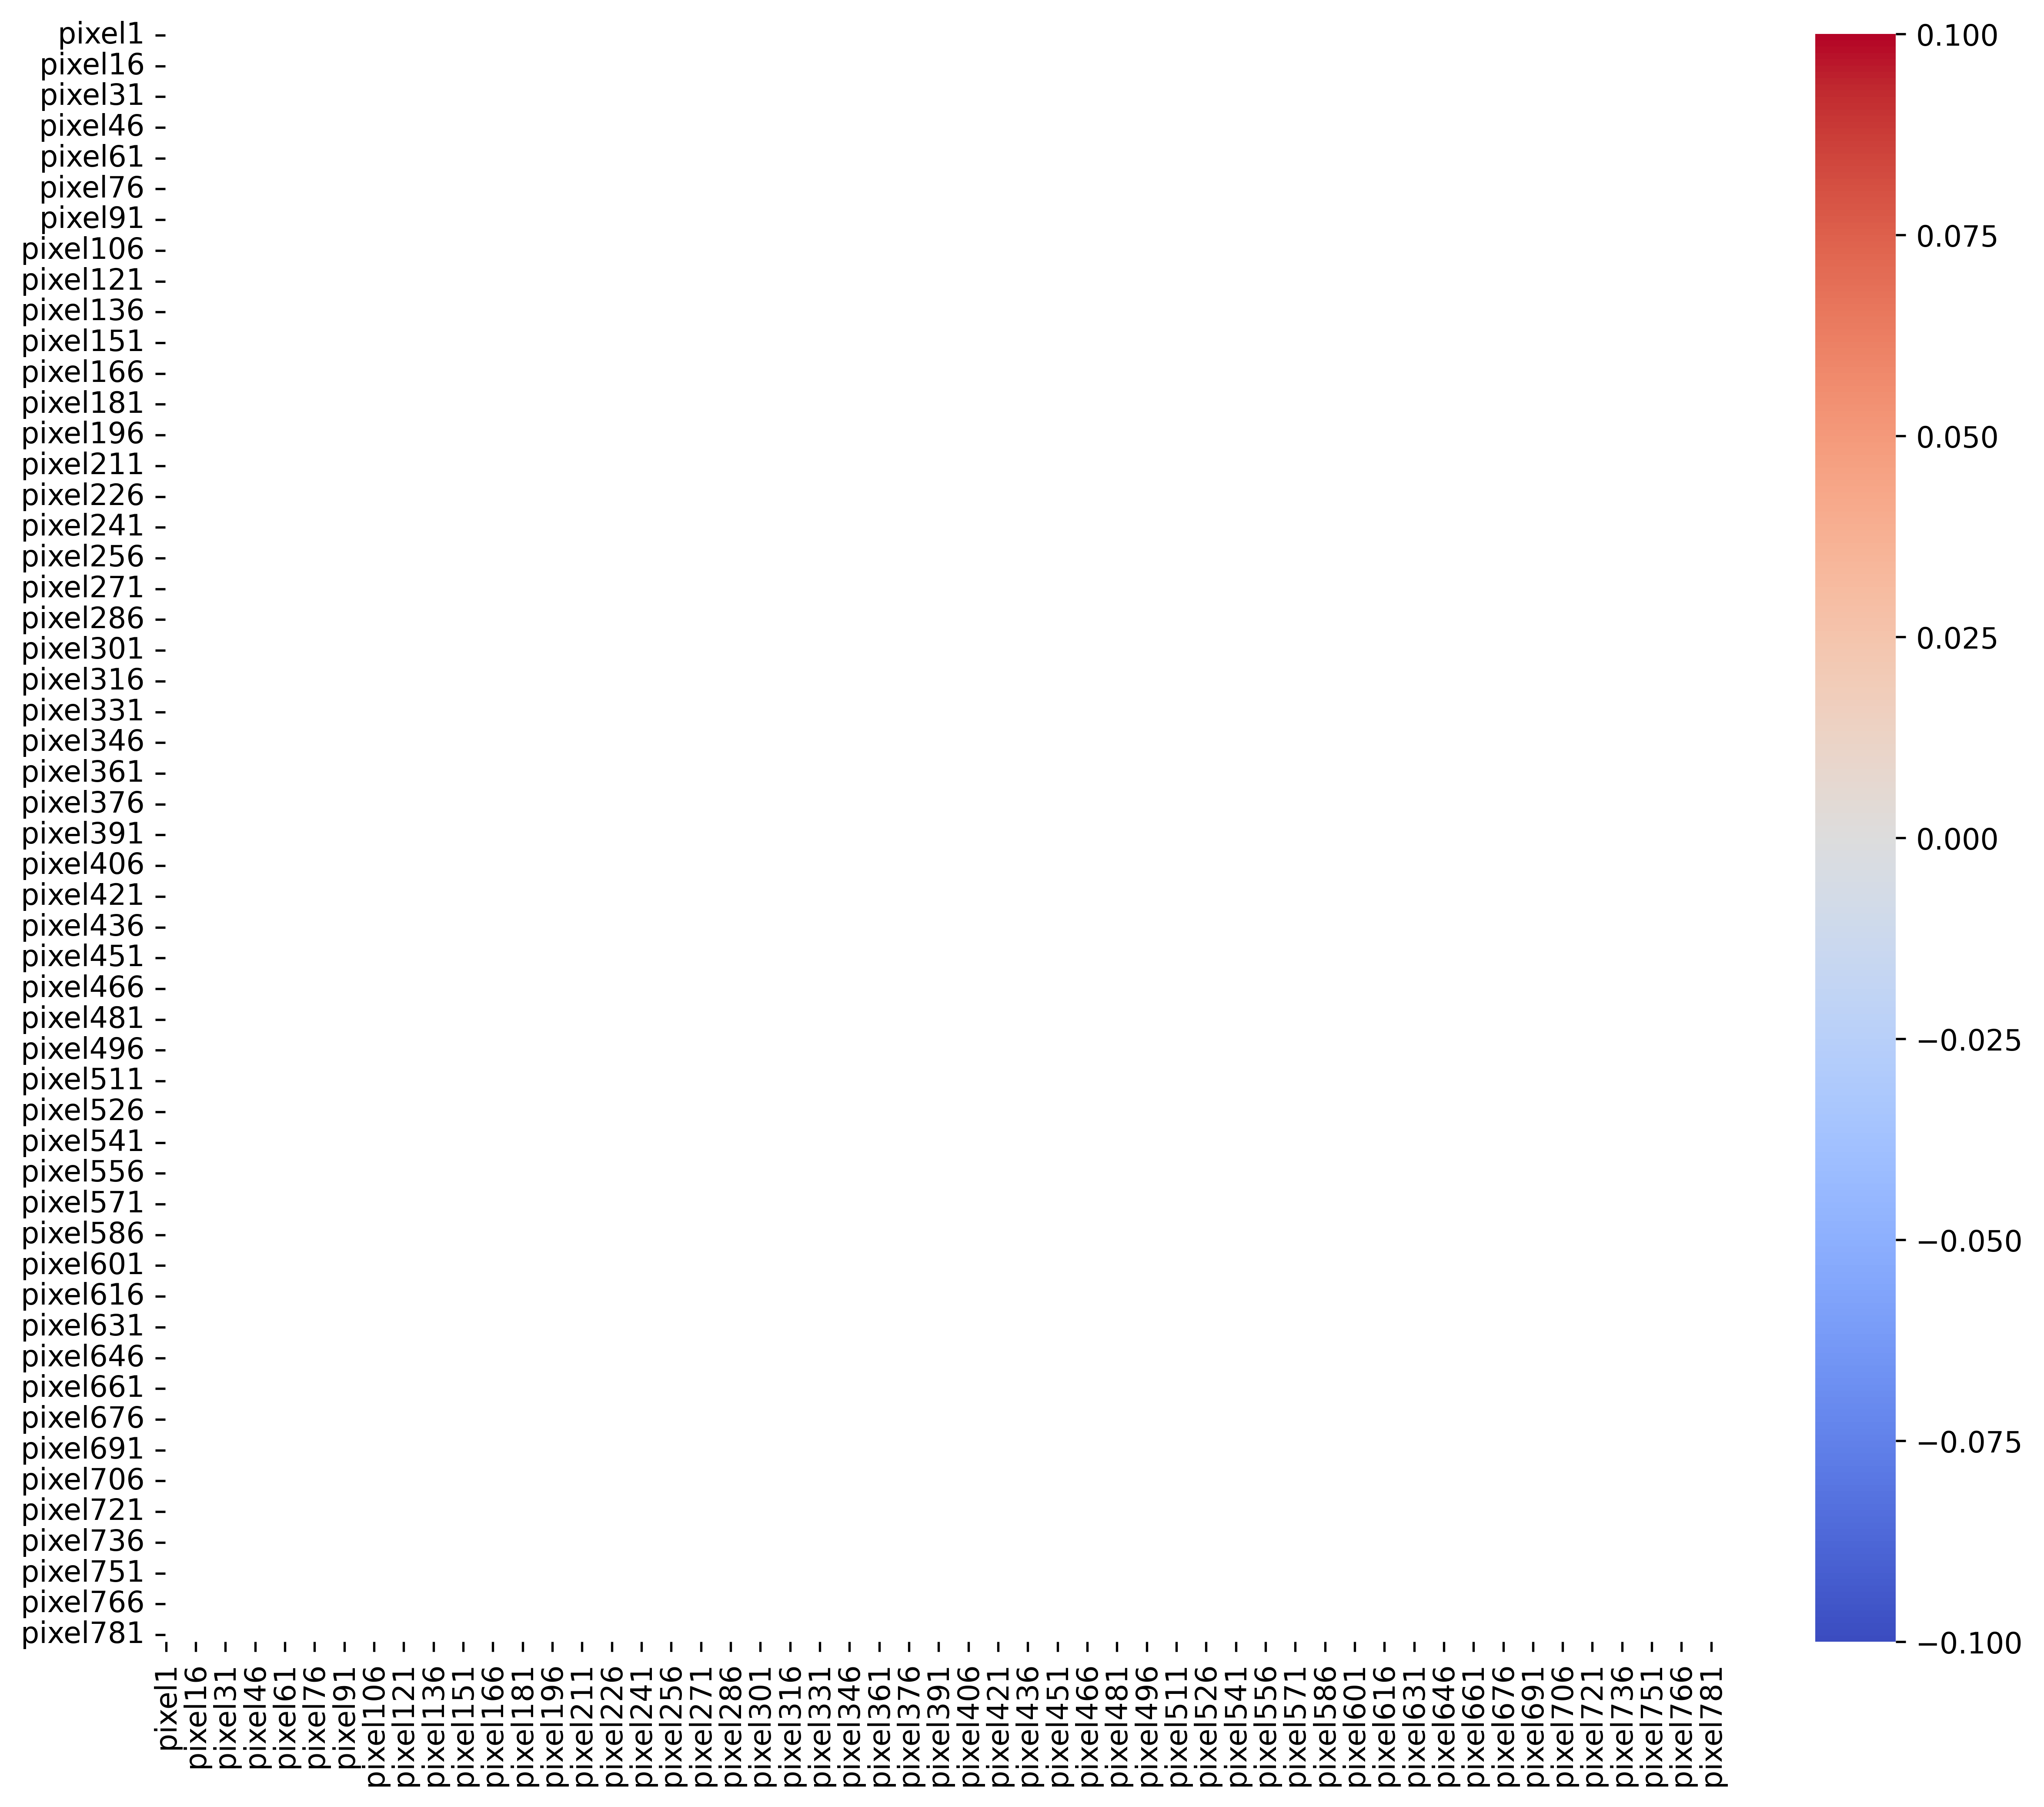

In [ ]:
# Using corr function in pandas to obatin correlation of columns), using cmap = 'coolwarm'
# to differentiate high, low, and medium correlations
plt.figure(figsize = (12, 10), dpi = 480)
sns.heatmap(pixels_data.corr(), cmap = 'coolwarm', annot=True, fmt = '.2f')
plt.show()

### <span style='color:blue'>The previous heatmap shows that there is no correlation between the features (pixels)</span>

## Normalizing by dividing each feature value by 255 and reshaping the array to eventually feed the CNN

In [ ]:
# Normalizing the pixel values of the images in train_pixels
train_pixels = train_pixels.values / 255.

reshaped_train_pixels = train_pixels.reshape((-1, 28, 28, 1))

# Printing reshaped_data_np
reshaped_train_pixels.shape

(27455, 28, 28, 1)

In [ ]:
# Normalizing the pixel values of the images in test_pixels
test_pixels = test_pixels.values / 255.

reshaped_test_pixels = test_pixels.reshape((-1, 28, 28, 1))

# Printing reshaped_data_np
reshaped_test_pixels.shape

(3586, 28, 28, 1)

In [ ]:
# Normalizing the pixel values of the images in test_pixels
val_pixels = val_pixels.values / 255.

reshaped_val_pixels = val_pixels.reshape((-1, 28, 28, 1))

# Printing reshaped_data_np
reshaped_val_pixels.shape

(3586, 28, 28, 1)

## Generating batches of augmented data from the given dataset

In [ ]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(reshaped_train_pixels)

# **2 - Modeling Steps**

## Creating our initial model

In [ ]:
initial_model = Sequential()
initial_model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
initial_model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
initial_model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
initial_model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
initial_model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
initial_model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
initial_model.add(Flatten())
initial_model.add(Dense(units = 512 , activation = 'relu'))
initial_model.add(Dropout(0.5))
initial_model.add(Dense(units = 24 , activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the initial model
initial_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Printing initial_model summary
initial_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 50)          │          33,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         205,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 263,449 (1.00 MB)

 Trainable params: 263,449 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

## Training our initial model

In [ ]:
# Fitting initial_model using the train and validation set
initial_model.fit(datagen.flow(reshaped_train_pixels,y_train, batch_size = 32) ,epochs = 20 , validation_data = (reshaped_val_pixels, val_labels))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 92s 105ms/step - accuracy: 0.2309 - loss: 2.5263 - val_accuracy: 0.8533 - val_loss: 0.4213
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 95s 111ms/step - accuracy: 0.7977 - loss: 0.6029 - val_accuracy: 0.9420 - val_loss: 0.1632
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 156s 127ms/step - accuracy: 0.8916 - loss: 0.3144 - val_accuracy: 0.9771 - val_loss: 0.0828
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 88s 103ms/step - accuracy: 0.9235 - loss: 0.2229 - val_accuracy: 0.9916 - val_loss: 0.0481
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 96s 111ms/step - accuracy: 0.9489 - loss: 0.1553 - val_accuracy: 0.9852 - val_loss: 0.0487
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 90s 105ms/step - accuracy: 0.9520 - loss: 0.1390 - val_accuracy: 0.9902 - val_loss: 0.0332
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 145s 109ms/step - accuracy: 0.9633 - loss: 0.1039 - val_accuracy: 0.9925 - val_loss: 0.0204
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 138s 104ms/step - accuracy: 0.9716 - loss: 0.0856 - 

## Obtaing initial_model metrics

In [ ]:
# Obtaining initial_model accuracy for the test set
print("The accuracy of the model related to test data: ", initial_model.evaluate(reshaped_test_pixels, test_labels) [1] * 100 , "%")

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9999 - loss: 0.0019
The accuracy of the model related to test data:  99.9721109867096 %


In [ ]:
# Obtaining initial_model predictions on the test set
initial_predictions = initial_model.predict(reshaped_test_pixels)
initial_predictions

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


array([[1.31220035e-09, 6.60611782e-17, 3.76349444e-16, ...,
        4.90605496e-22, 1.07352365e-11, 2.63172782e-11],
       [3.62752704e-30, 1.31632362e-27, 9.99999940e-01, ...,
        1.04585162e-35, 1.38371390e-24, 1.11212327e-35],
       [4.12137189e-04, 3.73396179e-15, 9.53621513e-13, ...,
        8.54940265e-16, 1.54471911e-12, 4.67315827e-15],
       ...,
       [6.17118661e-13, 2.01405055e-13, 2.59171464e-18, ...,
        3.46261851e-14, 4.48856403e-11, 5.02803488e-08],
       [6.74506414e-12, 2.56829225e-07, 6.68157456e-17, ...,
        1.74404990e-10, 1.26996183e-11, 1.24591179e-11],
       [7.67183886e-12, 3.19192779e-14, 9.99995351e-01, ...,
        5.94621841e-16, 4.31083036e-09, 4.92911818e-16]], dtype=float32)

In [ ]:
# Turning probabilities for each label into the labels
ini_predicted_labels = np.argmax(initial_predictions, axis = 1)
ini_predicted_labels

array([ 7,  2,  4, ..., 16, 19,  2])

In [ ]:
# Inversing transform to get the original test labels back
original_test_labels = label_binarizer.inverse_transform(test_labels)
original_test_labels

array([ 7,  2,  4, ..., 16, 19,  2])

In [ ]:
# Generating and printing the classification report
ini_report = classification_report(original_test_labels, ini_predicted_labels)
print(ini_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00       158
           3       1.00      1.00      1.00       118
           4       1.00      1.00      1.00       240
           5       1.00      1.00      1.00       124
           6       0.99      1.00      1.00       165
           7       1.00      1.00      1.00       221
           8       1.00      1.00      1.00       141
           9       1.00      1.00      1.00       178
          10       1.00      1.00      1.00       105
          11       1.00      1.00      1.00       200
          12       1.00      1.00      1.00       148
          13       1.00      1.00      1.00       129
          14       1.00      1.00      1.00       193
          15       1.00      1.00      1.00        77
          16       1.00      1.00      1.00        74
          17       1.00    

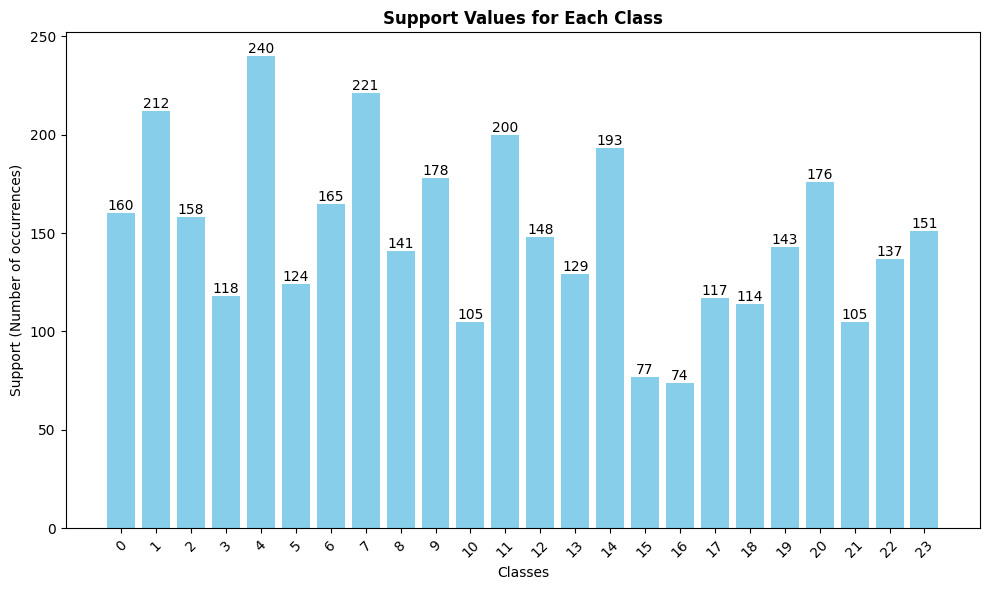

In [ ]:
# Generating the classification report as a dictionary to obtain the support values
ini_report_dict = classification_report(original_test_labels, ini_predicted_labels, output_dict = True)

# Extracting the support values (the number of actual occurrences of each class)
ini_support_values = {
    key: value['support'] for key, value in ini_report_dict.items() \
    if key not in ['accuracy', 'macro avg', 'weighted avg']
}

# Plotting the support values
plt.figure(figsize = (10, 6))

# Creating a bar plot where the x-axis is the class labels (keys) and the y-axis is the support values
bars = plt.bar(ini_support_values.keys(), ini_support_values.values(), color = 'skyblue')

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Support (Number of occurrences)')
plt.title('Support Values for Each Class', fontweight='bold')

# Rotating the x-axis labels to make them more readable
plt.xticks(rotation = 45)

# Adding the support value on top of each bar
for bar in bars:
    # Getting the height of each bar (the support value)
    height = bar.get_height()

    # Adding text above the bar (x position, y position, value to show, and optional parameters for alignment)
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}',
             ha = 'center', va = 'bottom', fontsize = 10, color = 'black')

# Displaying the plot
plt.tight_layout()
plt.show()

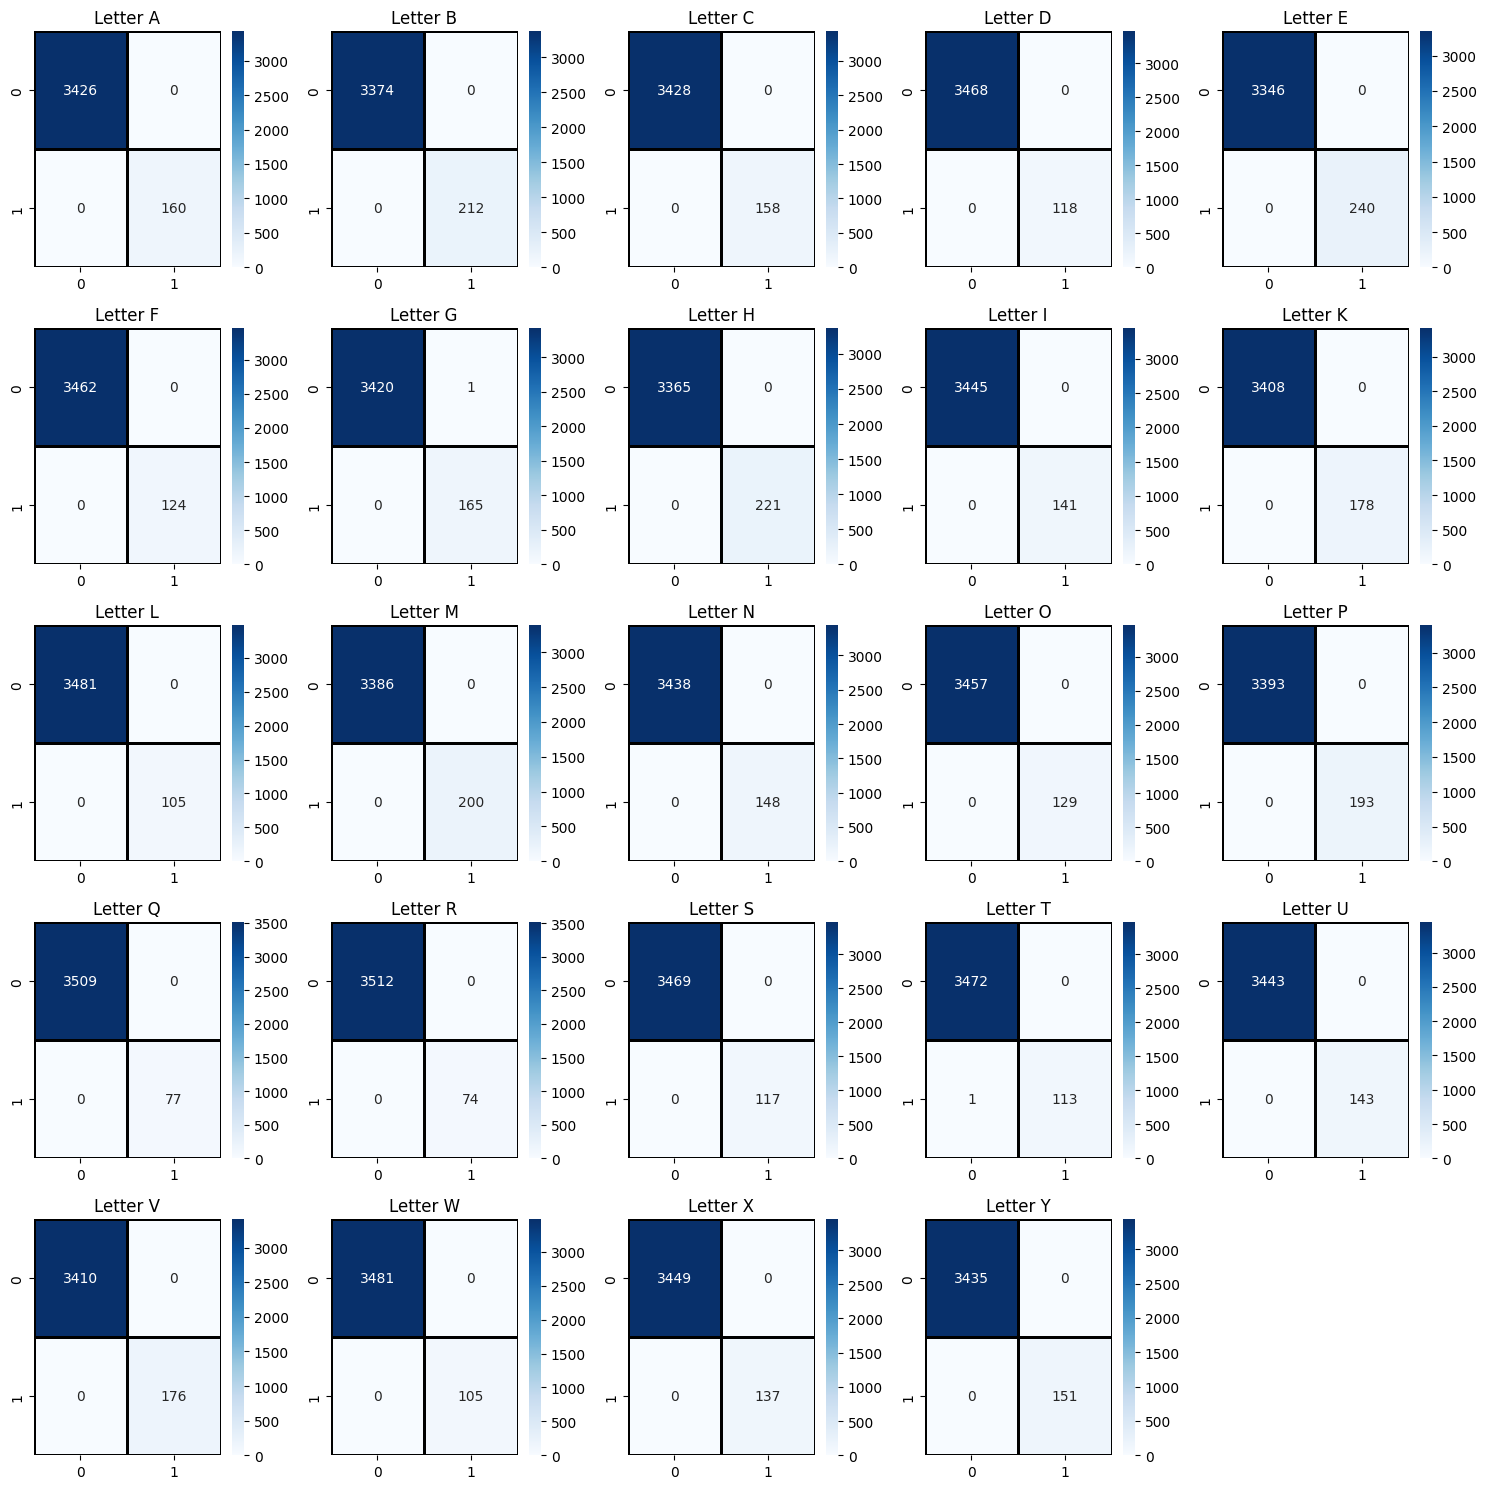

In [ ]:
# Generating the confusion matrix for each label using multilabel_confusion_matrix
ini_cm = multilabel_confusion_matrix(original_test_labels, ini_predicted_labels)

# Getting the number of labels
num_labels = ini_cm.shape[0]

# Generating a label list from 'Z' to 'Y', skipping 'j'
letters = [chr(i) for i in range(ord('A'), ord('Z') + 1) if chr(i) != 'J']

# Displaying the confusion matrix using a heatmap for each label
fig, axes = plt.subplots(nrows = num_labels // 5 + (num_labels % 5 > 0), \
                         ncols = min(num_labels, 5), figsize=(15, 15))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Iterating through each label and its corresponding confusion matrix
for i, ax in enumerate(axes):
    if i < num_labels:
        # Using the letter corresponding to the current label (from 'A' to 'Y', skipping 'J')
        ax.set_title(f"Letter {letters[i]}")  # Displaying the label as letter instead of number
        sns.heatmap(ini_cm[i], cmap = "Blues", linecolor = 'black', linewidth=1, \
                    annot = True, fmt = '', ax = ax)
    else:  # Hiding any extra axes
        ax.set_visible(False)

# Adjusting layout and show the plot
plt.tight_layout()
plt.show()

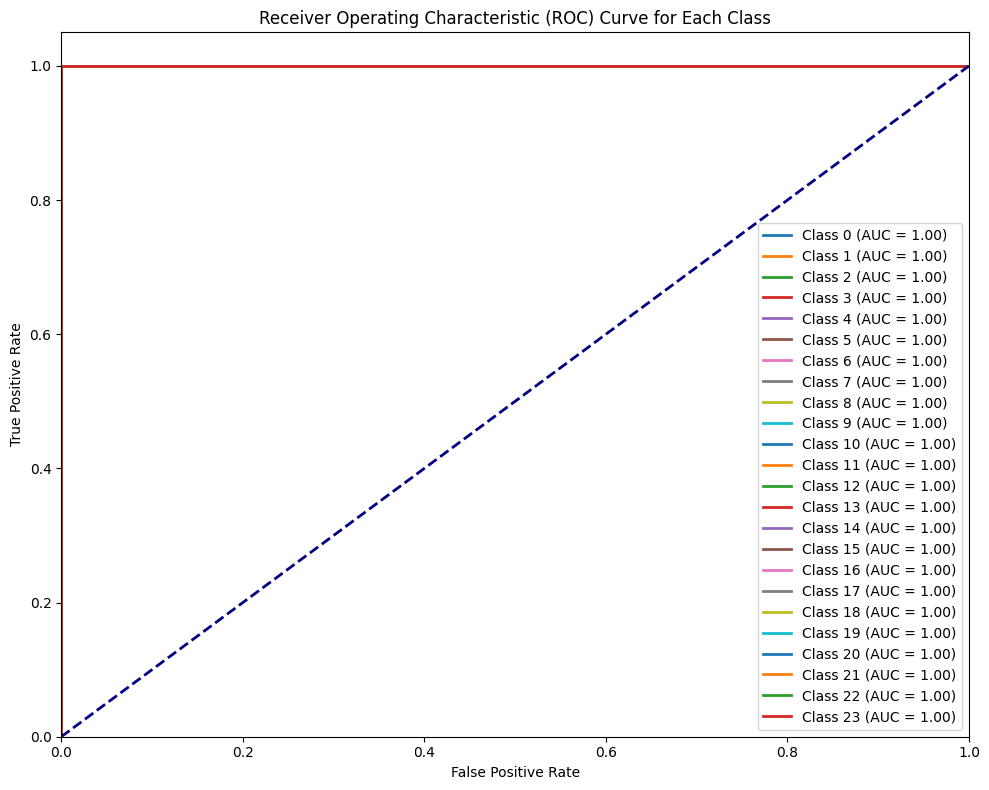

Macro-average AUC-ROC: 1.0000


In [ ]:
# Calculating ROC curve and AUC for each class
ini_fpr = {}
ini_tpr = {}
ini_roc_auc = {}

for i in range(24):
    ini_fpr[i], ini_tpr[i], _ = roc_curve(test_labels[:, i], initial_predictions[:, i])
    ini_roc_auc[i] = auc(ini_fpr[i], ini_tpr[i])

# Plotting ROC curves for each class
plt.figure(figsize=(10, 8))

# Plotting each ROC curve
for i in range(24):
    plt.plot(ini_fpr[i], ini_tpr[i], lw = 2, label = f'Class {i} (AUC = {ini_roc_auc[i]:.2f})')

# Plotting the random classifier diagonal line (AUC = 0.5)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')

# Customizing plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')

# Displaying the plot
plt.tight_layout()
plt.show()

# Calculating macro-average AUC
ini_macro_auc = np.mean(list(ini_roc_auc.values()))
print(f"Macro-average AUC-ROC: {ini_macro_auc:.4f}")

## Creating our intermediate model

In [ ]:
int_model = Sequential()
int_model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
int_model.add(BatchNormalization())
int_model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
int_model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
int_model.add(BatchNormalization())
int_model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
int_model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
int_model.add(Dropout(0.75))
int_model.add(BatchNormalization())
int_model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
int_model.add(Flatten())
int_model.add(Dense(units = 512 , activation = 'relu'))
int_model.add(Dropout(0.3))
int_model.add(Dense(units = 24 , activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the initial model
int_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Printing initial_model summary
int_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,481,432 (9.47 MB)

 Trainable params: 2,480,536 (9.46 MB)

 Non-trainable params: 896 (3.50 KB)

## Training our intermediate model

In [ ]:
# Fitting int_model using the train and validation set
int_model.fit(datagen.flow(reshaped_train_pixels,y_train, batch_size = 64) ,epochs = 20 , validation_data = (reshaped_val_pixels, val_labels))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


429/429 ━━━━━━━━━━━━━━━━━━━━ 214s 493ms/step - accuracy: 0.4265 - loss: 2.0894 - val_accuracy: 0.1138 - val_loss: 4.6625
Epoch 2/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 207s 482ms/step - accuracy: 0.8935 - loss: 0.3121 - val_accuracy: 0.4953 - val_loss: 2.2728
Epoch 3/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 208s 484ms/step - accuracy: 0.9475 - loss: 0.1570 - val_accuracy: 0.9387 - val_loss: 0.1587
Epoch 4/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 207s 482ms/step - accuracy: 0.9611 - loss: 0.1208 - val_accuracy: 0.9002 - val_loss: 0.2527
Epoch 5/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 265s 489ms/step - accuracy: 0.9712 - loss: 0.0908 - val_accuracy: 0.9504 - val_loss: 0.1089
Epoch 6/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 260s 484ms/step - accuracy: 0.9698 - loss: 0.0910 - val_accuracy: 0.8436 - val_loss: 0.4294
Epoch 7/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 260s 480ms/step - accuracy: 0.9755 - loss: 0.0778 - val_accuracy: 0.9774 - val_loss: 0.0589
Epoch 8/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 208s 484ms/step - accuracy: 0.9789 - loss: 0.06

## Obtaing int_model metrics

In [ ]:
# Obtaining int_model accuracy for the test set
print("The accuracy of the model related to test data: ", int_model.evaluate(reshaped_test_pixels, test_labels) [1] * 100 , "%")

113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9876 - loss: 0.0525
The accuracy of the model related to test data:  98.52203130722046 %


In [ ]:
# Obtaining int_model predictions on the test set
int_predictions = int_model.predict(reshaped_test_pixels)
int_predictions

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step


array([[1.2097134e-06, 3.1738147e-12, 1.6380224e-10, ..., 1.2506700e-11,
        2.4014042e-11, 8.8943198e-06],
       [1.4217250e-31, 4.3471422e-26, 9.9999994e-01, ..., 1.2974331e-29,
        2.1618026e-23, 2.2898657e-26],
       [1.4261106e-07, 1.2649132e-07, 2.0950913e-13, ..., 6.6011169e-10,
        1.6722458e-13, 1.4833212e-12],
       ...,
       [3.1040122e-11, 2.2369361e-10, 1.9496366e-13, ..., 6.2933297e-11,
        8.5970620e-10, 2.0837438e-08],
       [3.7787373e-09, 4.9615417e-05, 5.9892852e-10, ..., 6.7219407e-05,
        1.3059613e-09, 1.2198064e-06],
       [1.1164076e-08, 4.8697914e-11, 9.9994206e-01, ..., 6.7160865e-12,
        3.1464882e-08, 1.1934587e-09]], dtype=float32)

In [ ]:
# Turning probabilities for each label into the labels
int_predicted_labels = np.argmax(int_predictions, axis = 1)
int_predicted_labels

array([ 7,  2,  4, ..., 16, 19,  2])

In [ ]:
# Generating and printing the classification report for int_model
int_report = classification_report(original_test_labels, int_predicted_labels)
print(int_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       160
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00       158
           3       1.00      1.00      1.00       118
           4       1.00      1.00      1.00       240
           5       0.89      1.00      0.94       124
           6       1.00      0.94      0.97       165
           7       1.00      0.97      0.99       221
           8       0.95      1.00      0.97       141
           9       0.99      1.00      1.00       178
          10       1.00      1.00      1.00       105
          11       1.00      1.00      1.00       200
          12       0.99      0.97      0.98       148
          13       1.00      0.88      0.93       129
          14       1.00      1.00      1.00       193
          15       1.00      1.00      1.00        77
          16       1.00      0.99      0.99        74
          17       1.00    

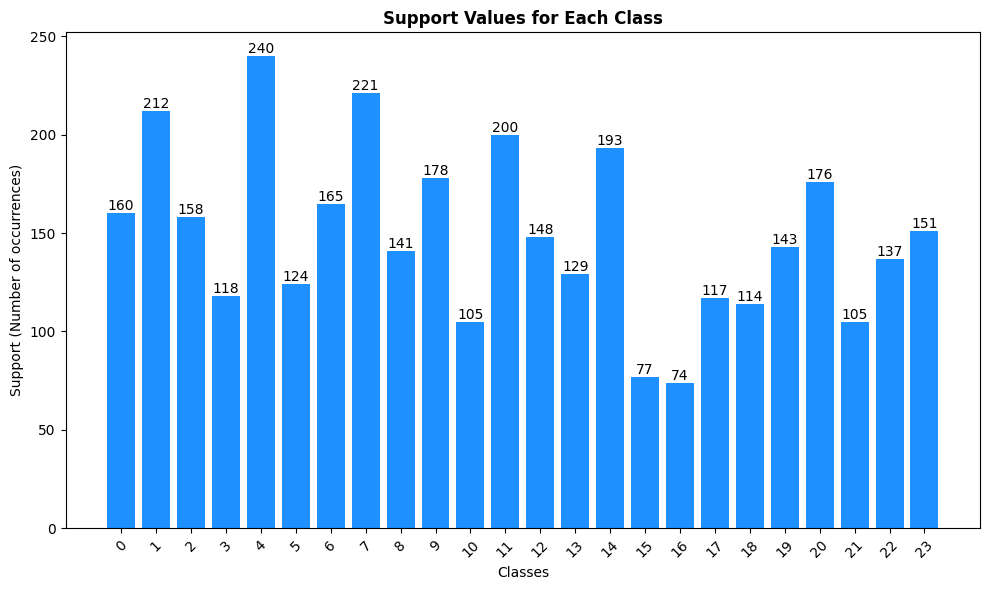

In [ ]:
# Generating the classification report as a dictionary to obtain the support values
int_report_dict = classification_report(original_test_labels, int_predicted_labels, output_dict = True)

# Extracting the support values (the number of actual occurrences of each class)
int_support_values = {
    key: value['support'] for key, value in int_report_dict.items() \
    if key not in ['accuracy', 'macro avg', 'weighted avg']
}

# Plotting the support values
plt.figure(figsize = (10, 6))

# Creating a bar plot where the x-axis is the class labels (keys) and the y-axis is the support values
bars = plt.bar(int_support_values.keys(), int_support_values.values(), color = 'dodgerblue')

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Support (Number of occurrences)')
plt.title('Support Values for Each Class', fontweight = 'bold')

# Rotating the x-axis labels to make them more readable
plt.xticks(rotation = 45)

# Adding the support value on top of each bar
for bar in bars:
    # Getting the height of each bar (the support value)
    height = bar.get_height()

    # Adding text above the bar (x position, y position, value to show, and optional parameters for alignment)
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}',
             ha = 'center', va = 'bottom', fontsize = 10, color = 'black')

# Displaying the plot
plt.tight_layout()
plt.show()

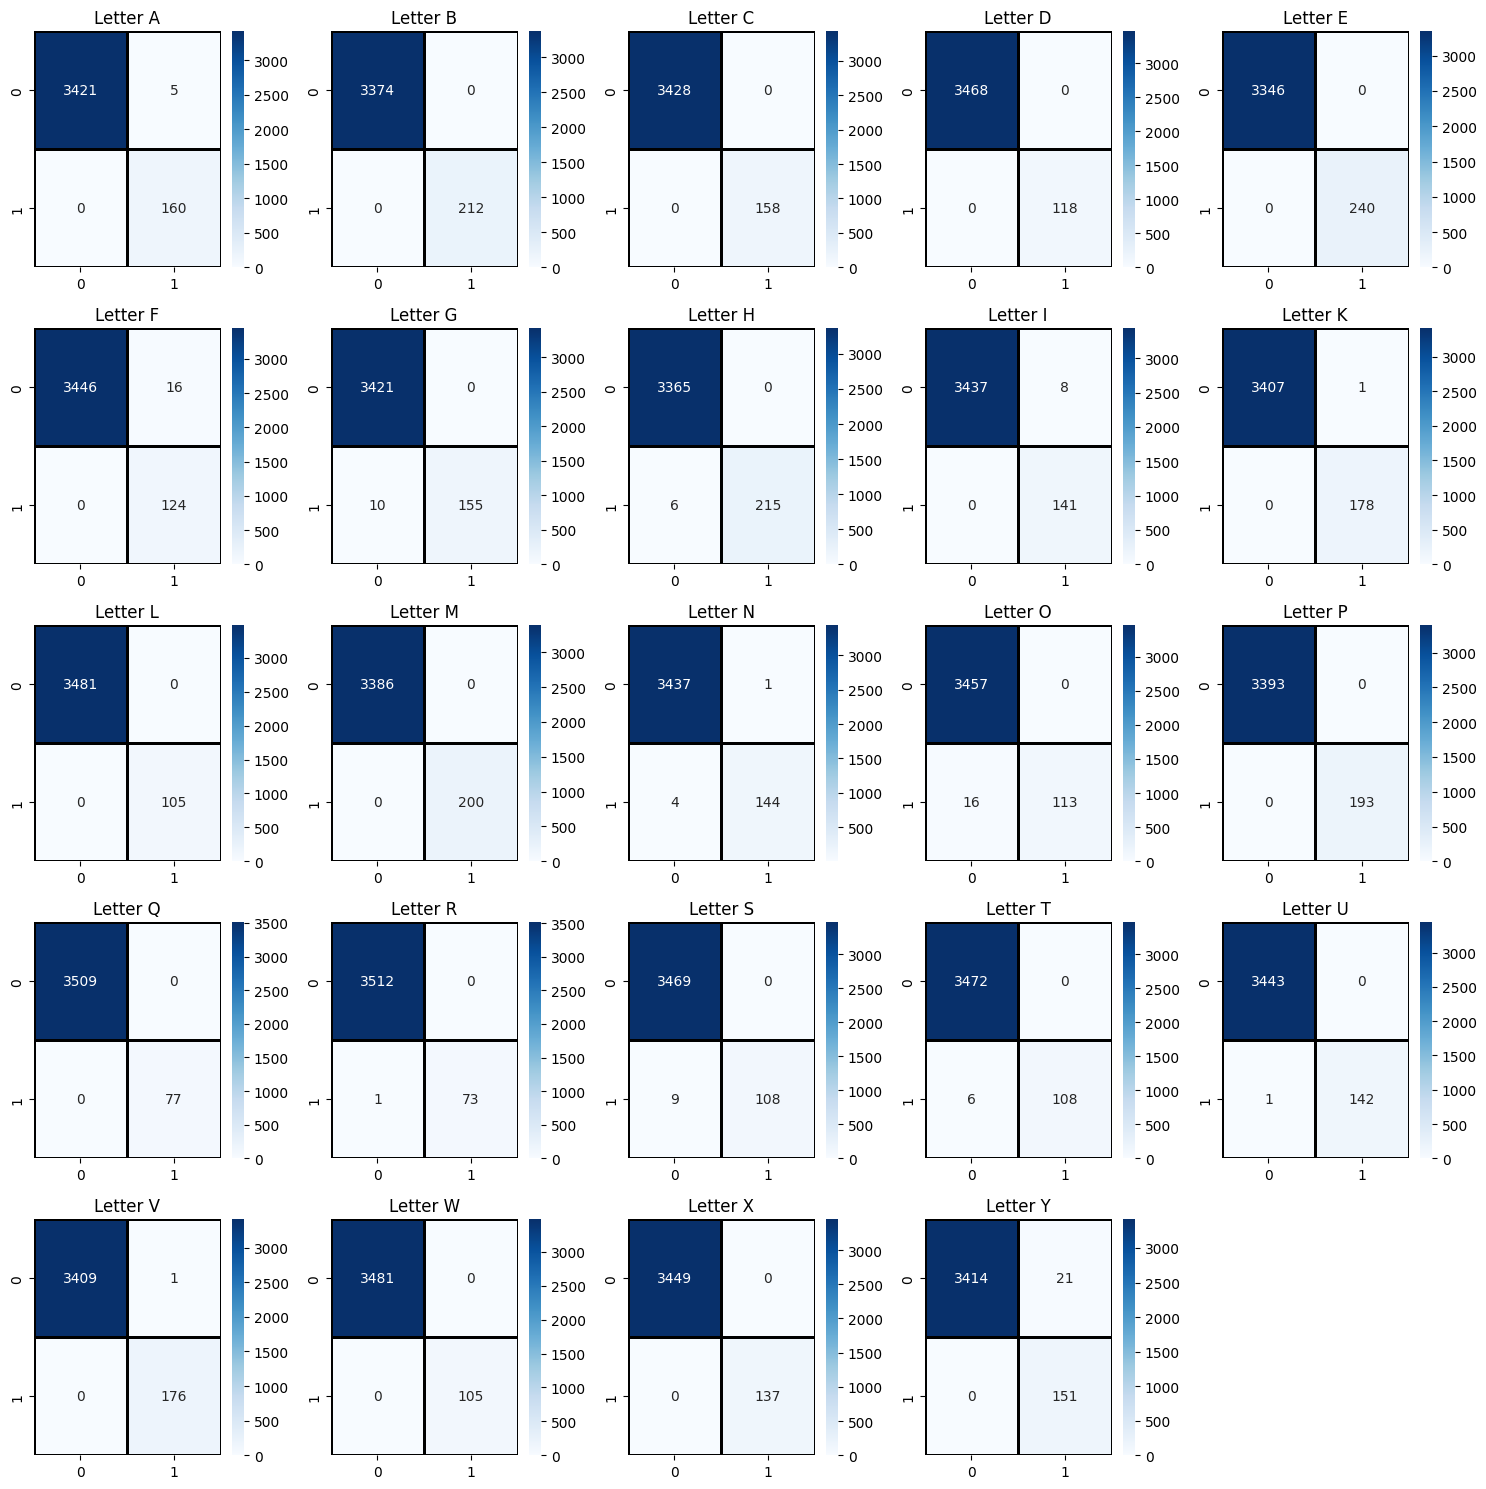

In [ ]:
# Generating the confusion matrix for each label using multilabel_confusion_matrix
int_cm = multilabel_confusion_matrix(original_test_labels, int_predicted_labels)

# Getting the number of labels
num_labels = int_cm.shape[0]

# Displaying the confusion matrix using a heatmap for each label
fig, axes = plt.subplots(nrows = num_labels // 5 + (num_labels % 5 > 0), \
                         ncols = min(num_labels, 5), figsize=(15, 15))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Iterating through each label and its corresponding confusion matrix
for i, ax in enumerate(axes):
    if i < num_labels:
        # Using the letter corresponding to the current label (from 'A' to 'Y', skipping 'J')
        ax.set_title(f"Letter {letters[i]}")  # Displaying the label as letter instead of number
        sns.heatmap(int_cm[i], cmap = "Blues", linecolor = 'black', linewidth=1, \
                    annot = True, fmt = '', ax = ax)
    else:  # Hiding any extra axes
        ax.set_visible(False)

# Adjusting layout and show the plot
plt.tight_layout()
plt.show()

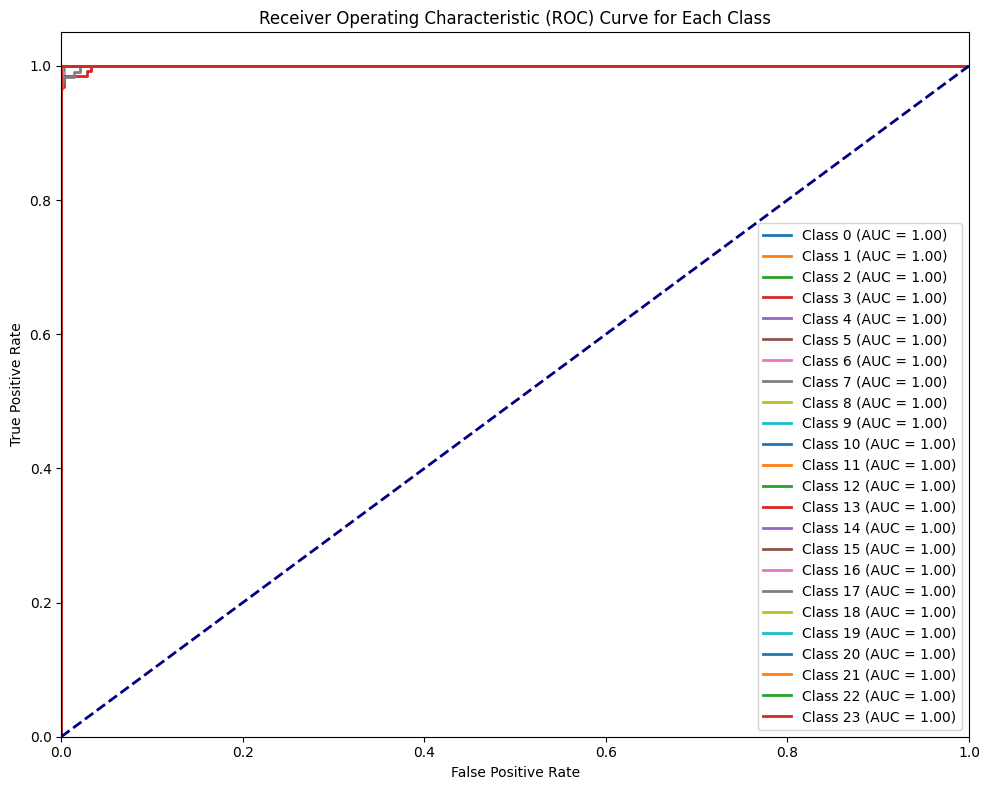

Macro-average AUC-ROC: 1.0000


In [ ]:
# Calculating ROC curve and AUC for each class
int_fpr = {}
int_tpr = {}
int_roc_auc = {}

for i in range(24):
    int_fpr[i], int_tpr[i], _ = roc_curve(test_labels[:, i], int_predictions[:, i])
    int_roc_auc[i] = auc(int_fpr[i], int_tpr[i])

# Plotting ROC curves for each class
plt.figure(figsize=(10, 8))

# Plotting each ROC curve
for i in range(24):
    plt.plot(int_fpr[i], int_tpr[i], lw = 2, label = f'Class {i} (AUC = {int_roc_auc[i]:.2f})')

# Plotting the random classifier diagonal line (AUC = 0.5)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')

# Customizing plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')

# Displaying the plot
plt.tight_layout()
plt.show()

# Calculating macro-average AUC
int_macro_auc = np.mean(list(int_roc_auc.values()))
print(f"Macro-average AUC-ROC: {int_macro_auc:.4f}")

## Creating our best model

In [ ]:
best_model = Sequential()
best_model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
best_model.add(BatchNormalization())
best_model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
best_model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
best_model.add(Dropout(0.2))
best_model.add(BatchNormalization())
best_model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
best_model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
best_model.add(BatchNormalization())
best_model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
best_model.add(Flatten())
best_model.add(Dense(units = 512 , activation = 'relu'))
best_model.add(Dropout(0.3))
best_model.add(Dense(units = 24 , activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling best_model
best_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Printing best_model summary
best_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 75)          │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 50)          │          33,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 25)            │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         205,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,049 (1.01 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

## Training our best model

In [ ]:
# Creating an instance of the ReduceLROnPlateau callback, which is often used in deep learning with Keras (or TensorFlow) to reduce
# the learning rate when a model’s performance plateaus during training. Monitoring the val_accuracy and reduceing the learning rate
# when it stops improving.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
# Fitting the best_model using the train and validation set
best_model.fit(datagen.flow(reshaped_train_pixels,y_train, batch_size = 128) ,epochs = 20 , validation_data = (reshaped_val_pixels, val_labels) , callbacks = [learning_rate_reduction])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 125s 566ms/step - accuracy: 0.4756 - loss: 1.7676 - val_accuracy: 0.1439 - val_loss: 3.3269 - learning_rate: 0.0010
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 135s 531ms/step - accuracy: 0.9197 - loss: 0.2461 - val_accuracy: 0.7008 - val_loss: 0.9506 - learning_rate: 0.0010
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 144s 545ms/step - accuracy: 0.9654 - loss: 0.1117 - val_accuracy: 0.8809 - val_loss: 0.3149 - learning_rate: 0.0010
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 138s 528ms/step - accuracy: 0.9794 - loss: 0.0677 - val_accuracy: 0.9621 - val_loss: 0.1270 - learning_rate: 0.0010
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 140s 520ms/step - accuracy: 0.9839 - loss: 0.0515 - val_accuracy: 0.9838 - val_loss: 0.0476 - learning_rate: 0.0010
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 117s 541ms/step - accuracy: 0.9863 - loss: 0.0427 - val_accuracy: 0.9579 - val_loss: 0.1232 - learning_rate: 0.0010
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 136s 514ms/step - accuracy: 0.9900 

## Obtaing best_model metrics

In [ ]:
# Obtaining best_model accuracy on the test set
print("The accuracy of the model related to test data: ", best_model.evaluate(reshaped_test_pixels, test_labels) [1] * 100 , "%")

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 1.0000 - loss: 4.5075e-04
The accuracy of the model related to test data:  100.0 %


In [ ]:
# Obtaining best_model predictions on the test set
predictions = best_model.predict(reshaped_test_pixels)
predictions

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step


array([[2.4999633e-12, 1.7863867e-13, 1.9963804e-10, ..., 5.0623818e-15,
        7.4130690e-10, 5.9388730e-13],
       [1.2753598e-16, 1.2983676e-16, 9.9999994e-01, ..., 3.0835962e-19,
        1.4125217e-12, 1.0025269e-18],
       [8.3111290e-06, 8.3644750e-08, 2.8336994e-11, ..., 2.4493614e-11,
        1.1363334e-11, 1.2365282e-08],
       ...,
       [1.5323298e-12, 1.9169321e-11, 5.4574932e-13, ..., 3.3849448e-10,
        5.3019380e-09, 1.7563652e-09],
       [2.7908687e-12, 4.3782597e-06, 2.2704265e-13, ..., 6.1430208e-11,
        6.3443348e-11, 8.5217441e-12],
       [3.1748680e-06, 5.0033346e-12, 9.9997270e-01, ..., 1.2569203e-10,
        1.0893005e-05, 8.0750379e-10]], dtype=float32)

In [ ]:
# Turning probabilities for each label into the labels
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([ 7,  2,  4, ..., 16, 19,  2])

In [ ]:
# Generating and printing the classification report
report = classification_report(original_test_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00       158
           3       1.00      1.00      1.00       118
           4       1.00      1.00      1.00       240
           5       1.00      1.00      1.00       124
           6       1.00      1.00      1.00       165
           7       1.00      1.00      1.00       221
           8       1.00      1.00      1.00       141
           9       1.00      1.00      1.00       178
          10       1.00      1.00      1.00       105
          11       1.00      1.00      1.00       200
          12       1.00      1.00      1.00       148
          13       1.00      1.00      1.00       129
          14       1.00      1.00      1.00       193
          15       1.00      1.00      1.00        77
          16       1.00      1.00      1.00        74
          17       1.00    

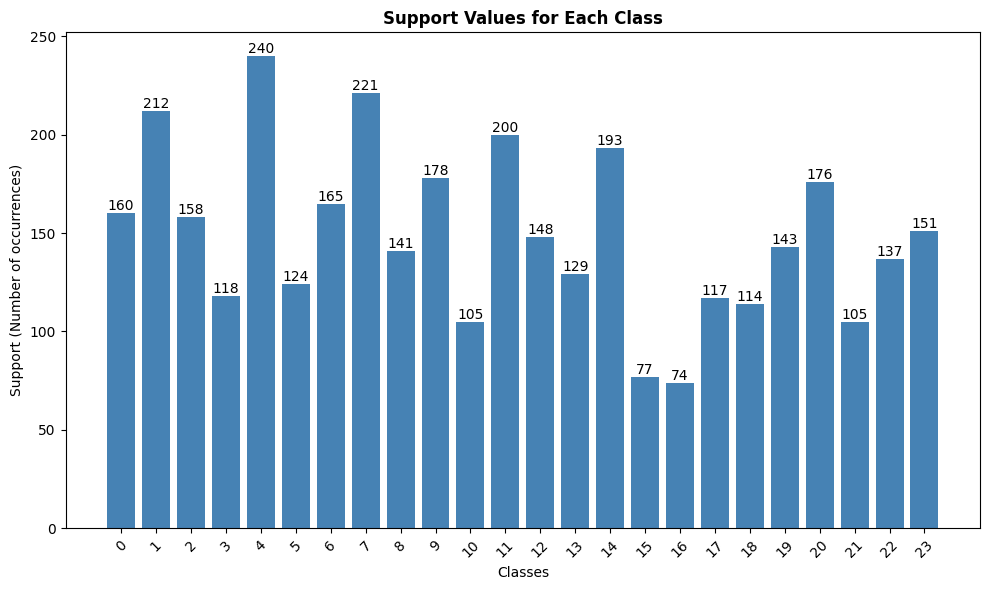

In [ ]:
# Generating the classification report as a dictionary to obtain the support values
report_dict = classification_report(original_test_labels, predicted_labels, output_dict = True)

# Extracting the support values (the number of actual occurrences of each class)
support_values = {
    key: value['support'] for key, value in report_dict.items() if key not in ['accuracy', 'macro avg', 'weighted avg']
}

# Plotting the support values
plt.figure(figsize = (10, 6))

# Creating a bar plot where the x-axis is the class labels (keys) and the y-axis is the support values
bars = plt.bar(support_values.keys(), support_values.values(), color = 'steelblue')

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Support (Number of occurrences)')
plt.title('Support Values for Each Class', fontweight = 'bold')

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Adding the support value on top of each bar
for bar in bars:
    # Getting the height of each bar (the support value)
    height = bar.get_height()

    # Adding text above the bar (x position, y position, value to show, and optional parameters for alignment)
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}',
             ha = 'center', va = 'bottom', fontsize = 10, color = 'black')

# Displaying the plot
plt.tight_layout()
plt.show()

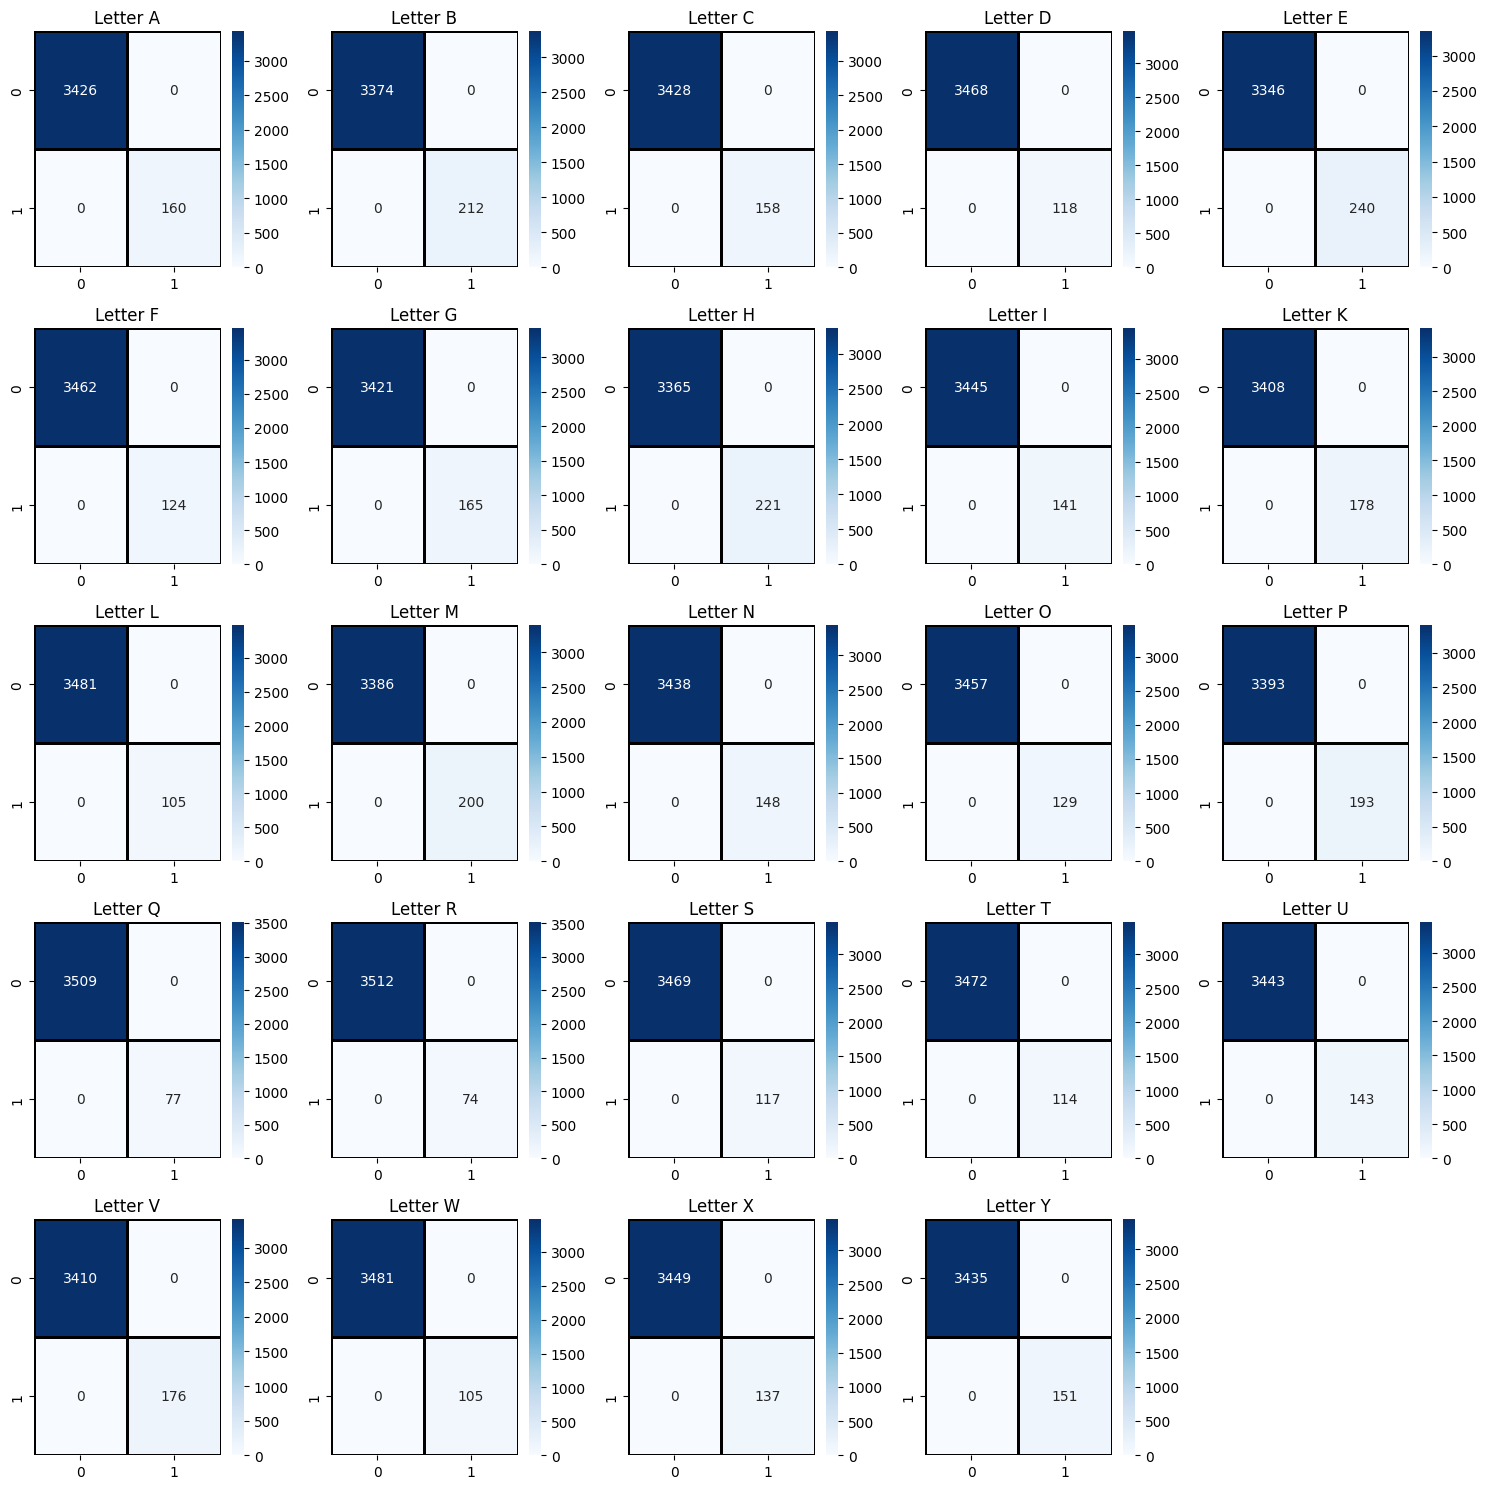

In [ ]:
# Generating the confusion matrix for each label using multilabel_confusion_matrix
cm = multilabel_confusion_matrix(original_test_labels, predicted_labels)

# Getting the number of labels
num_labels = cm.shape[0]

# Displaying the confusion matrix using a heatmap for each label
fig, axes = plt.subplots(nrows = num_labels // 5 + (num_labels % 5 > 0), \
                         ncols=min(num_labels, 5), figsize=(15, 15))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Iterating through each label and its corresponding confusion matrix
for i, ax in enumerate(axes):
    if i < num_labels:
        # Using the letter corresponding to the current label (from 'A' to 'Y', skipping 'J')
        ax.set_title(f"Letter {letters[i]}")  # Displaying the label as letter instead of number
        sns.heatmap(cm[i], cmap="Blues", linecolor='black', linewidth=1, \
                    annot=True, fmt='', ax=ax)
    else:  # Hiding any extra axes
        ax.set_visible(False)

# Adjusting layout and show the plot
plt.tight_layout()
plt.show()

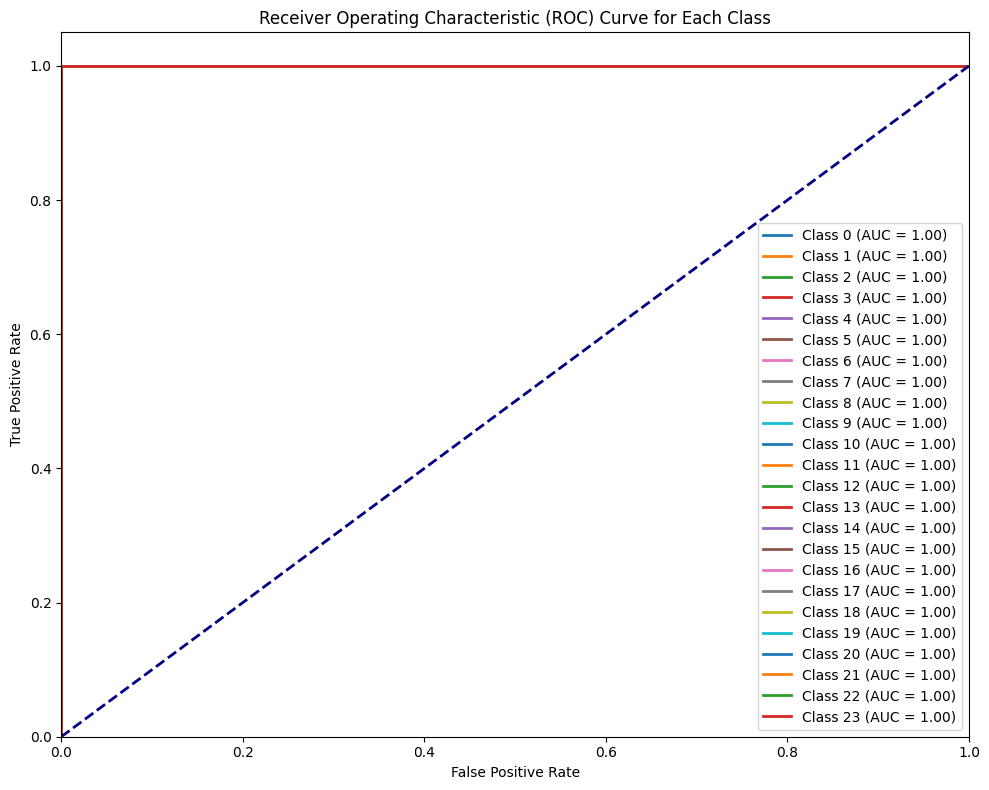

Macro-average AUC-ROC: 1.0000


In [ ]:
# Calculating ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(24):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves for each class
plt.figure(figsize=(10, 8))

# Plotting each ROC curve
for i in range(24):
    plt.plot(fpr[i], tpr[i], lw = 2, label = f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plotting the random classifier diagonal line (AUC = 0.5)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')

# Customizing plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')

# Displaying the plot
plt.tight_layout()
plt.show()

# Calculating macro-average AUC
macro_auc = np.mean(list(roc_auc.values()))
print(f"Macro-average AUC-ROC: {macro_auc:.4f}")

In [ ]:
# Converting grayscale (28, 28, 1) to (28, 28, 3) by repeating the single channel 3 times, to feed the DenseNet121 model
reshaped_train_pixels_rgb = np.repeat(reshaped_train_pixels, 3, axis=-1)
reshaped_test_pixels_rgb = np.repeat(reshaped_val_pixels, 3, axis=-1)
reshaped_val_pixels_rgb = np.repeat(reshaped_val_pixels, 3, axis=-1)

In [ ]:
# Resizing the images to 32x32 using OpenCV
reshaped_train_pixels_rgb = np.array([cv2.resize(img, (32, 32)) for img in reshaped_train_pixels_rgb])
reshaped_test_pixels_rgb = np.array([cv2.resize(img, (32, 32)) for img in reshaped_test_pixels_rgb])
reshaped_val_pixels_rgb = np.array([cv2.resize(img, (32, 32)) for img in reshaped_val_pixels_rgb])

In [ ]:
# Creating the DenseNet121 base model (pre-trained on ImageNet)
base_model = DenseNet121(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

# Freezing the layers of the base model so they won't be updated during training
base_model.trainable = False

# Adding custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global pooling to reduce dimensions
x = Dense(512, activation='relu')(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Dropout for regularization
x = Dense(24, activation='softmax')(x)  # Output layer with 24 classes for classification

# Creating the complete model
base_model = Model(input = base_model.input, outputs = x)

In [ ]:
# Compiling the model
base_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Printing the model summary
base_model.summary()

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_4          │ (None, 38, 38, 3)      │              0 │ input_layer_5[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,408 │ zero_padding2d_4[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_5          │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 8, 8, 64)       │              0 │ zero_padding2d_5[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 8, 8, 64)       │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 128)      │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 128)      │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 128)      │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 32)       │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 8, 8, 96)       │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,574,616 (28.89 MB)

 Trainable params: 537,112 (2.05 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
# Fitting the base model using data augmentation (train and validation data)
base_model.fit(datagen.flow(reshaped_train_pixels_rgb, y_train, batch_size=128), epochs = 20, validation_data = (reshaped_val_pixels_rgb, val_labels),
               callbacks = [learning_rate_reduction])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 144s 602ms/step - accuracy: 0.5517 - loss: 1.4970 - val_accuracy: 0.8567 - val_loss: 0.4622 - learning_rate: 0.0010
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 137s 577ms/step - accuracy: 0.8594 - loss: 0.4346 - val_accuracy: 0.8985 - val_loss: 0.3022 - learning_rate: 0.0010
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 151s 617ms/step - accuracy: 0.9056 - loss: 0.2947 - val_accuracy: 0.9286 - val_loss: 0.2403 - learning_rate: 0.0010
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 139s 608ms/step - accuracy: 0.9311 - loss: 0.2163 - val_accuracy: 0.9387 - val_loss: 0.2027 - learning_rate: 0.0010
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 143s 610ms/step - accuracy: 0.9447 - loss: 0.1754 - val_accuracy: 0.9490 - val_loss: 0.1615 - learning_rate: 0.0010
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 130s 602ms/step - accuracy: 0.9472 - loss: 0.1634 - val_accuracy: 0.9465 - val_loss: 0.1519 - learning_rate: 0.0010
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 144s 611ms/step - accuracy: 0.9582 

In [ ]:
# Obtaining base_model accuracy on the test set
print("The accuracy of the model related to test data: ", base_model.evaluate(reshaped_test_pixels_rgb, test_labels) [1] * 100 , "%")

113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 129ms/step - accuracy: 0.0458 - loss: 18.4646
The accuracy of the model related to test data:  4.656999558210373 %


In [ ]:
# Obtaining base_model predictions on the test set
base_model_predictions = base_model.predict(reshaped_test_pixels_rgb)
base_model_predictions

113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 159ms/step


array([[3.50784159e-12, 8.12593465e-11, 4.66276392e-11, ...,
        6.92153549e-07, 1.11213351e-10, 5.00051328e-07],
       [8.03696953e-12, 2.39434228e-09, 2.03354261e-11, ...,
        1.00211250e-09, 1.71082240e-06, 8.60754384e-11],
       [6.14870864e-04, 2.39847907e-07, 2.06792211e-05, ...,
        2.97599883e-07, 1.28325587e-06, 9.91150500e-07],
       ...,
       [2.22745393e-13, 2.88532331e-09, 3.24265940e-12, ...,
        1.94859591e-15, 7.16188437e-12, 1.63496872e-11],
       [1.16270085e-05, 2.33332187e-07, 8.44316037e-06, ...,
        6.84142787e-09, 1.79126580e-08, 2.06976929e-05],
       [8.85113007e-15, 9.99999285e-01, 1.99593319e-15, ...,
        1.44137584e-11, 8.36075888e-16, 1.97926528e-14]], dtype=float32)

In [ ]:
# Getting predicted labels by finding the index with the highest probability
base_model_predicted_labels = np.argmax(base_model_predictions, axis=1)
base_model_predicted_labels

array([20,  3,  4, ..., 14, 11,  1])

In [ ]:
# Generating and printing the classification report
base_model_report = classification_report(original_test_labels, base_model_predicted_labels)
print(base_model_report)

              precision    recall  f1-score   support

           0       0.02      0.03      0.02       160
           1       0.07      0.06      0.06       212
           2       0.04      0.04      0.04       158
           3       0.01      0.01      0.01       118
           4       0.09      0.10      0.09       240
           5       0.06      0.06      0.06       124
           6       0.05      0.05      0.05       165
           7       0.05      0.05      0.05       221
           8       0.05      0.06      0.05       141
           9       0.05      0.05      0.05       178
          10       0.04      0.04      0.04       105
          11       0.06      0.06      0.06       200
          12       0.03      0.03      0.03       148
          13       0.03      0.03      0.03       129
          14       0.06      0.05      0.05       193
          15       0.03      0.04      0.04        77
          16       0.03      0.03      0.03        74
          17       0.04    

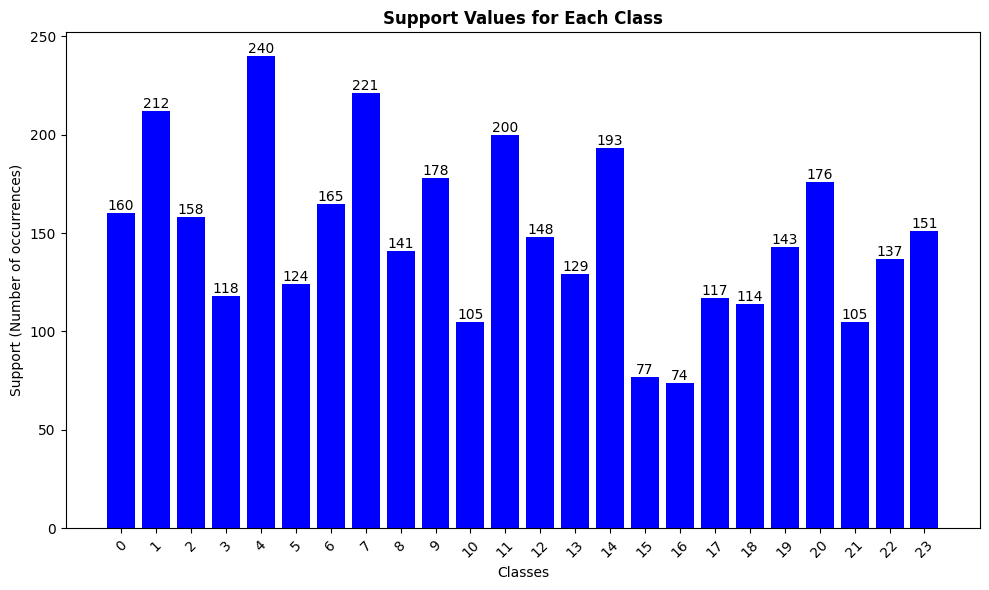

In [ ]:
# Generating the classification report as a dictionary to obtain the support values
base_model_report_dict = classification_report(original_test_labels, base_model_predicted_labels, output_dict = True)

# Extracting the support values (the number of actual occurrences of each class)
base_model_support_values = {
    key: value['support'] for key, value in base_model_report_dict.items() if key not in ['accuracy', 'macro avg', 'weighted avg']
}

# Plotting the support values
plt.figure(figsize = (10, 6))

# Creating a bar plot where the x-axis is the class labels (keys) and the y-axis is the support values
bars = plt.bar(base_model_support_values.keys(), base_model_support_values.values(), color = 'blue')

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Support (Number of occurrences)')
plt.title('Support Values for Each Class', fontweight = 'bold')

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation = 45)

# Adding the support value on top of each bar
for bar in bars:
    # Getting the height of each bar (the support value)
    height = bar.get_height()

    # Adding text above the bar (x position, y position, value to show, and optional parameters for alignment)
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}',
             ha = 'center', va = 'bottom', fontsize = 10, color = 'black')

# Displaying the plot
plt.tight_layout()
plt.show()

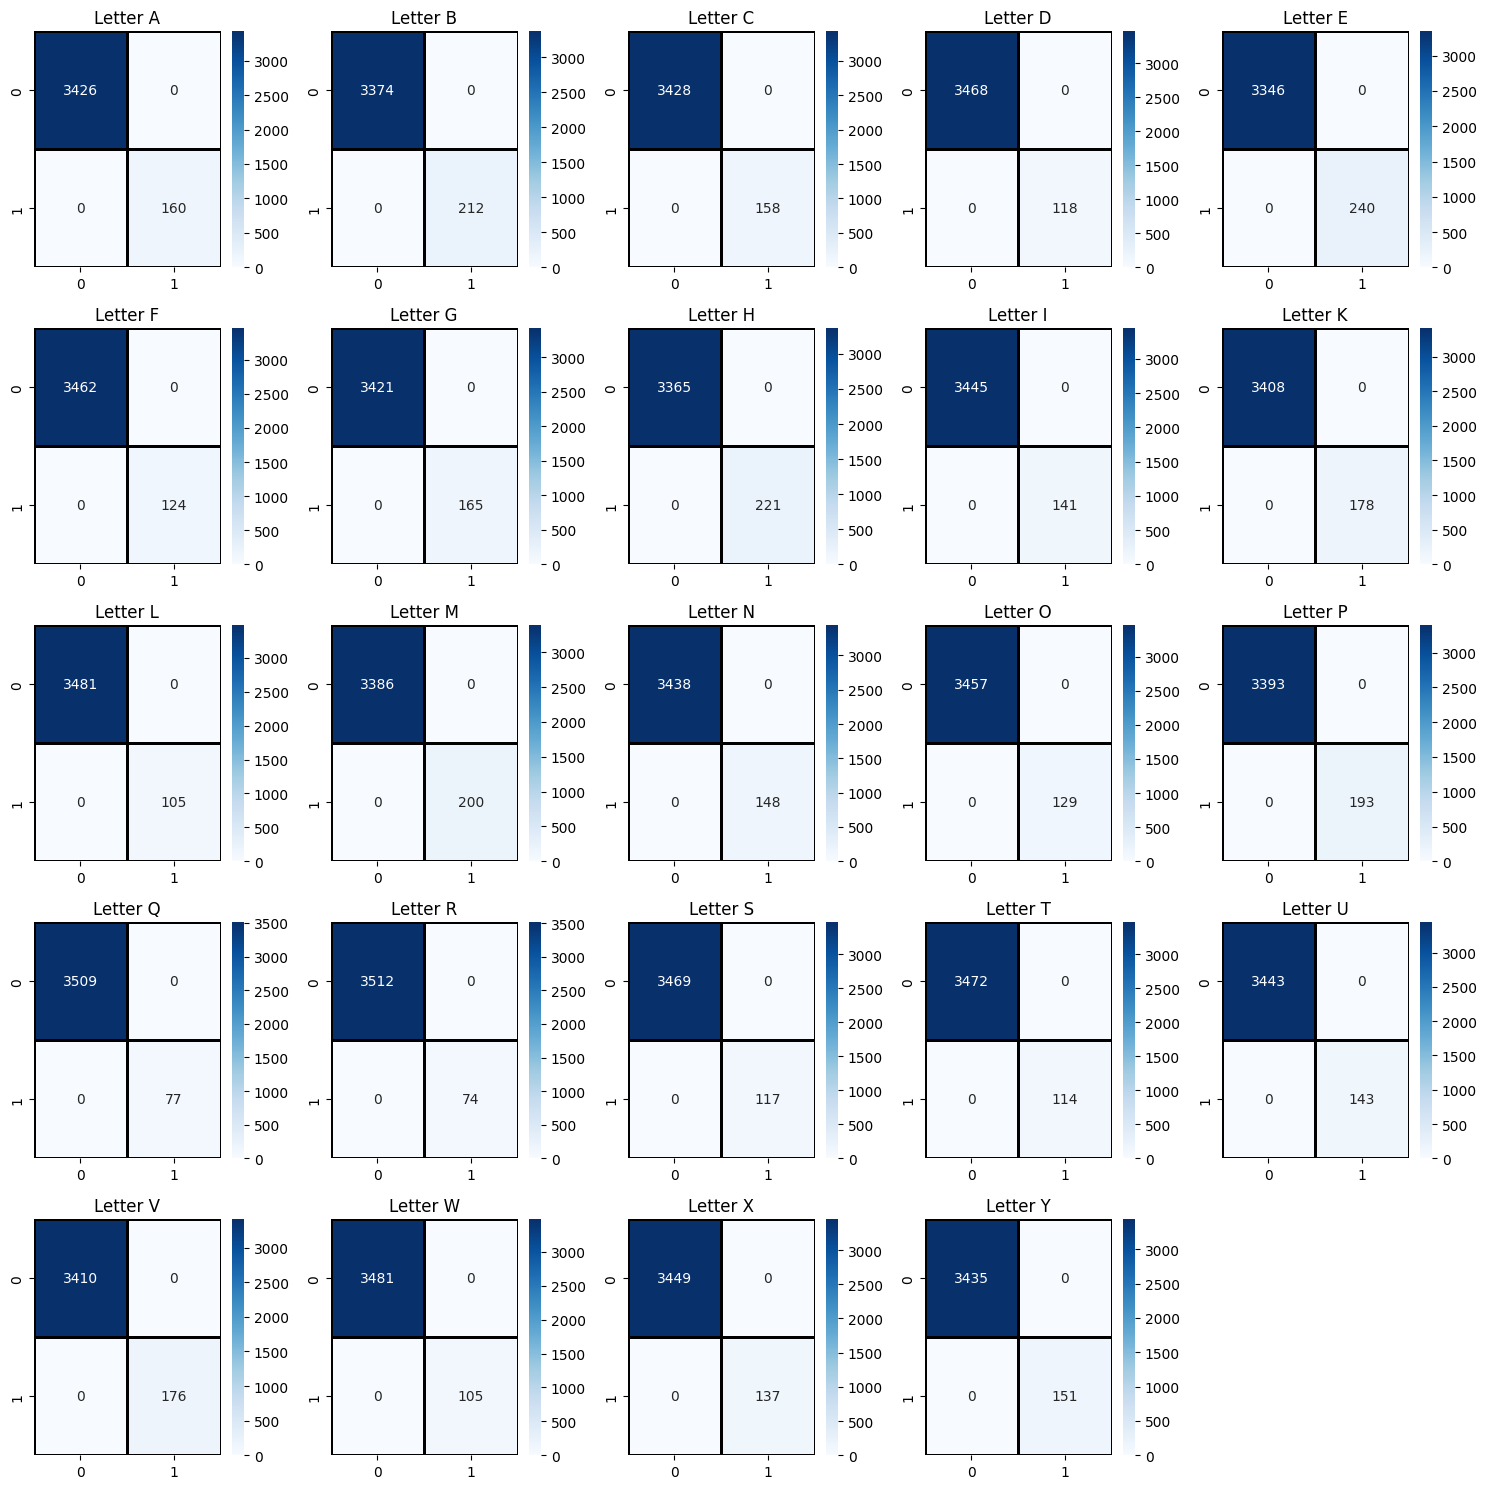

In [ ]:
# Generating the confusion matrix for each label using multilabel_confusion_matrix
base_cm = multilabel_confusion_matrix(original_test_labels, base_model_predicted_labels)

# Getting the number of labels
num_labels = base_cm.shape[0]

# Displaying the confusion matrix using a heatmap for each label
fig, axes = plt.subplots(nrows = num_labels // 5 + (num_labels % 5 > 0), \
                         ncols=min(num_labels, 5), figsize=(15, 15))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Iterating through each label and its corresponding confusion matrix
for i, ax in enumerate(axes):
    if i < num_labels:
        # Using the letter corresponding to the current label (from 'A' to 'Y', skipping 'J')
        ax.set_title(f"Letter {letters[i]}")  # Displaying the label as letter instead of number
        sns.heatmap(cm[i], cmap="Blues", linecolor='black', linewidth=1, \
                    annot=True, fmt='', ax=ax)
    else:  # Hiding any extra axes
        ax.set_visible(False)

# Adjusting layout and show the plot
plt.tight_layout()
plt.show()

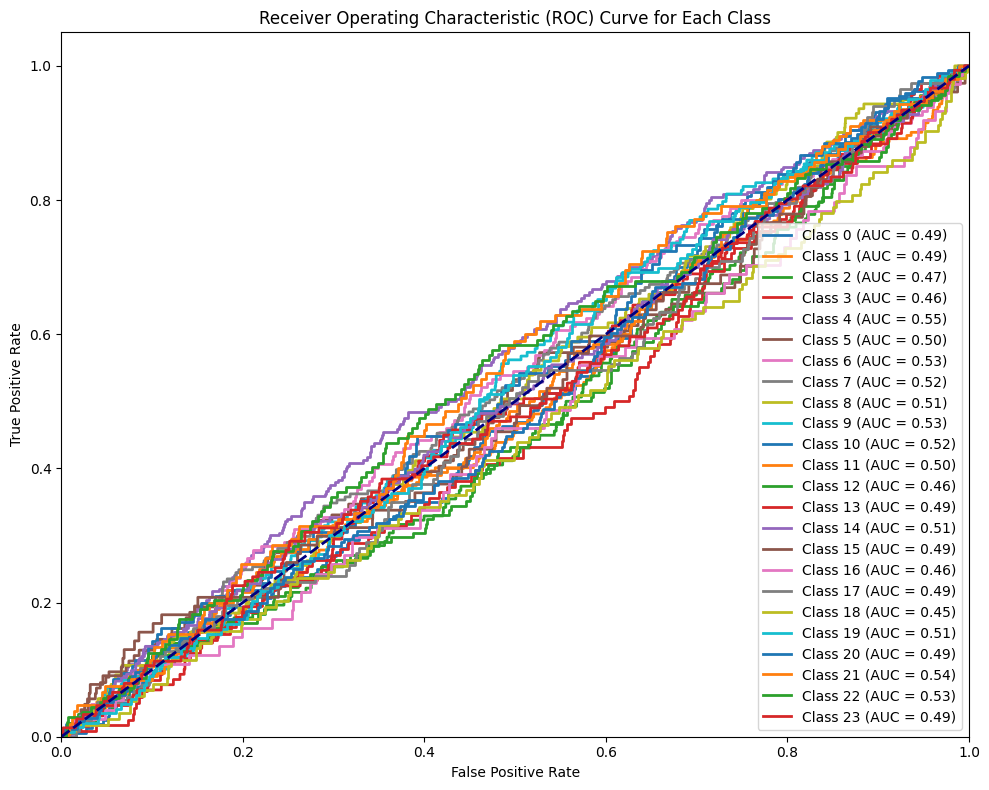

Macro-average AUC-ROC: 0.4993


In [ ]:
# Calculating ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(24):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], base_model_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves for each class
plt.figure(figsize = (10, 8))

# Plotting each ROC curve
for i in range(24):
    plt.plot(fpr[i], tpr[i], lw = 2, label = f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plotting the random classifier diagonal line (AUC = 0.5)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')

# Customizing plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')

# Displaying the plot
plt.tight_layout()
plt.show()

# Calculating macro-average AUC
macro_auc = np.mean(list(roc_auc.values()))
print(f"Macro-average AUC-ROC: {macro_auc:.4f}")

In [ ]:
# Loading VGG16 pre-trained on ImageNet, without the top layers
vgg16_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

# Freeze the base model layers
vgg16_model.trainable = False

# Add custom layers
x = vgg16_model.output
x = Flatten()(x)  # Flattening the output of the convolutional base
x = Dense(512, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(24, activation='softmax')(x)  # Output layer with 24 classes

# Creating the complete model
model = Model(inputs = vgg16_model.input, outputs = x)

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Print model summary
model.summary()

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,989,656 (57.18 MB)

 Trainable params: 274,968 (1.05 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Fitting the base model using data augmentation (train and validation data)
model.fit(datagen.flow(reshaped_train_pixels_rgb, y_train, batch_size=128), epochs = 20, validation_data = (reshaped_val_pixels_rgb, val_labels),
               callbacks = [learning_rate_reduction])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 528s 2s/step - accuracy: 0.3627 - loss: 2.1799 - val_accuracy: 0.6598 - val_loss: 0.9741 - learning_rate: 0.0010
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step - accuracy: 0.7008 - loss: 0.9147 - val_accuracy: 0.7995 - val_loss: 0.6221 - learning_rate: 0.0010
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.7838 - loss: 0.6609 - val_accuracy: 0.8380 - val_loss: 0.5027 - learning_rate: 0.0010
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.8290 - loss: 0.5316 - val_accuracy: 0.8597 - val_loss: 0.4475 - learning_rate: 0.0010
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - accuracy: 0.8559 - loss: 0.4493 - val_accuracy: 0.8781 - val_loss: 0.3608 - learning_rate: 0.0010
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.8661 - loss: 0.4065 - val_accuracy: 0.9066 - val_loss: 0.3121 - learning_rate: 0.0010
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 416s 2s/step - accuracy: 0.8878 - loss: 0.3547 - val_

In [ ]:
# Obtaining base_model accuracy on the test set
print("The accuracy of the model related to test data: ", model.evaluate(reshaped_test_pixels_rgb, test_labels) [1] * 100 , "%")

113/113 ━━━━━━━━━━━━━━━━━━━━ 48s 421ms/step - accuracy: 0.0464 - loss: 16.2926
The accuracy of the model related to test data:  4.573340713977814 %


In [ ]:
# Obtaining base_model predictions on the test set
model_predictions = model.predict(reshaped_test_pixels_rgb)
model_predictions

113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 411ms/step


array([[2.0350519e-08, 1.2757508e-03, 1.6547688e-09, ..., 9.2155650e-02,
        8.2567432e-08, 1.5520652e-04],
       [1.6160763e-10, 3.1284364e-06, 7.3083659e-09, ..., 3.7656819e-11,
        5.0604853e-05, 3.0848526e-08],
       [4.1878911e-06, 1.1325507e-06, 6.6543922e-05, ..., 8.1995193e-09,
        4.1244230e-06, 3.7528429e-07],
       ...,
       [4.0204169e-15, 3.6457515e-13, 1.8957440e-12, ..., 7.1297311e-14,
        1.0811348e-09, 8.3935168e-12],
       [3.7325761e-05, 1.6412179e-07, 2.7560548e-06, ..., 8.6665306e-09,
        5.3603336e-04, 7.2520917e-05],
       [8.7436112e-09, 9.3613130e-01, 2.6425184e-06, ..., 5.1810156e-07,
        8.5999517e-08, 3.9573079e-06]], dtype=float32)

In [ ]:
# Getting predicted labels by finding the index with the highest probability
model_predicted_labels = np.argmax(model_predictions, axis=1)
model_predicted_labels

array([20,  3,  4, ..., 14, 11,  1])

In [ ]:
# Generating and printing the classification report
model_report = classification_report(original_test_labels, model_predicted_labels)
print(model_report)

              precision    recall  f1-score   support

           0       0.02      0.03      0.02       160
           1       0.07      0.06      0.06       212
           2       0.03      0.03      0.03       158
           3       0.01      0.01      0.01       118
           4       0.09      0.10      0.10       240
           5       0.06      0.06      0.06       124
           6       0.05      0.05      0.05       165
           7       0.05      0.05      0.05       221
           8       0.05      0.06      0.06       141
           9       0.05      0.04      0.05       178
          10       0.04      0.04      0.04       105
          11       0.06      0.06      0.06       200
          12       0.03      0.03      0.03       148
          13       0.03      0.03      0.03       129
          14       0.05      0.05      0.05       193
          15       0.03      0.04      0.04        77
          16       0.02      0.03      0.02        74
          17       0.03    

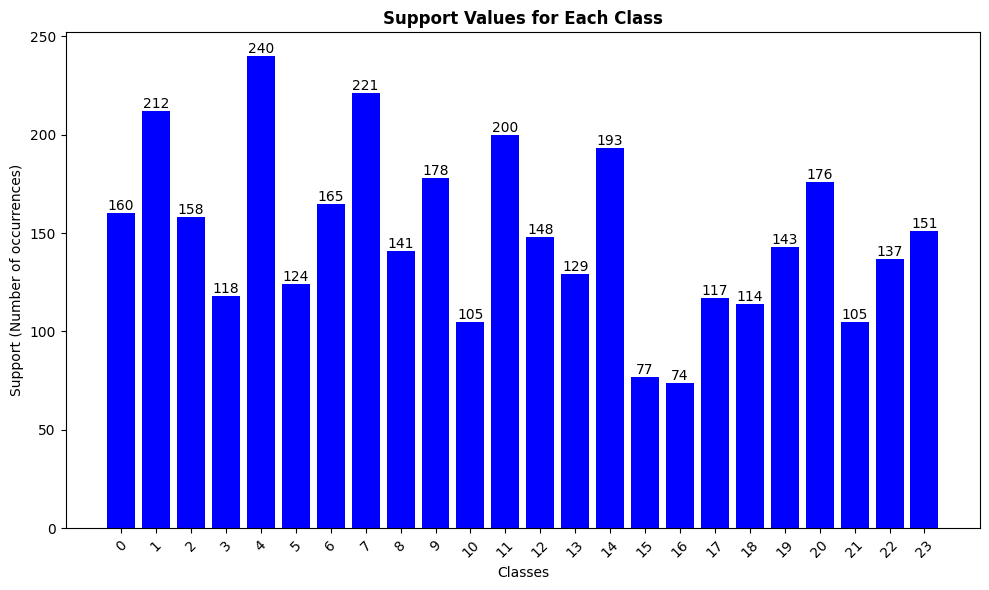

In [ ]:
# Generating the classification report as a dictionary to obtain the support values
model_report_dict = classification_report(original_test_labels, model_predicted_labels, output_dict = True)

# Extracting the support values (the number of actual occurrences of each class)
model_support_values = {
    key: value['support'] for key, value in model_report_dict.items() if key not in ['accuracy', 'macro avg', 'weighted avg']
}

# Plotting the support values
plt.figure(figsize = (10, 6))

# Creating a bar plot where the x-axis is the class labels (keys) and the y-axis is the support values
bars = plt.bar(model_support_values.keys(), model_support_values.values(), color = 'blue')

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Support (Number of occurrences)')
plt.title('Support Values for Each Class', fontweight = 'bold')

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation = 45)

# Adding the support value on top of each bar
for bar in bars:
    # Getting the height of each bar (the support value)
    height = bar.get_height()

    # Adding text above the bar (x position, y position, value to show, and optional parameters for alignment)
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}',
             ha = 'center', va = 'bottom', fontsize = 10, color = 'black')

# Displaying the plot
plt.tight_layout()
plt.show()

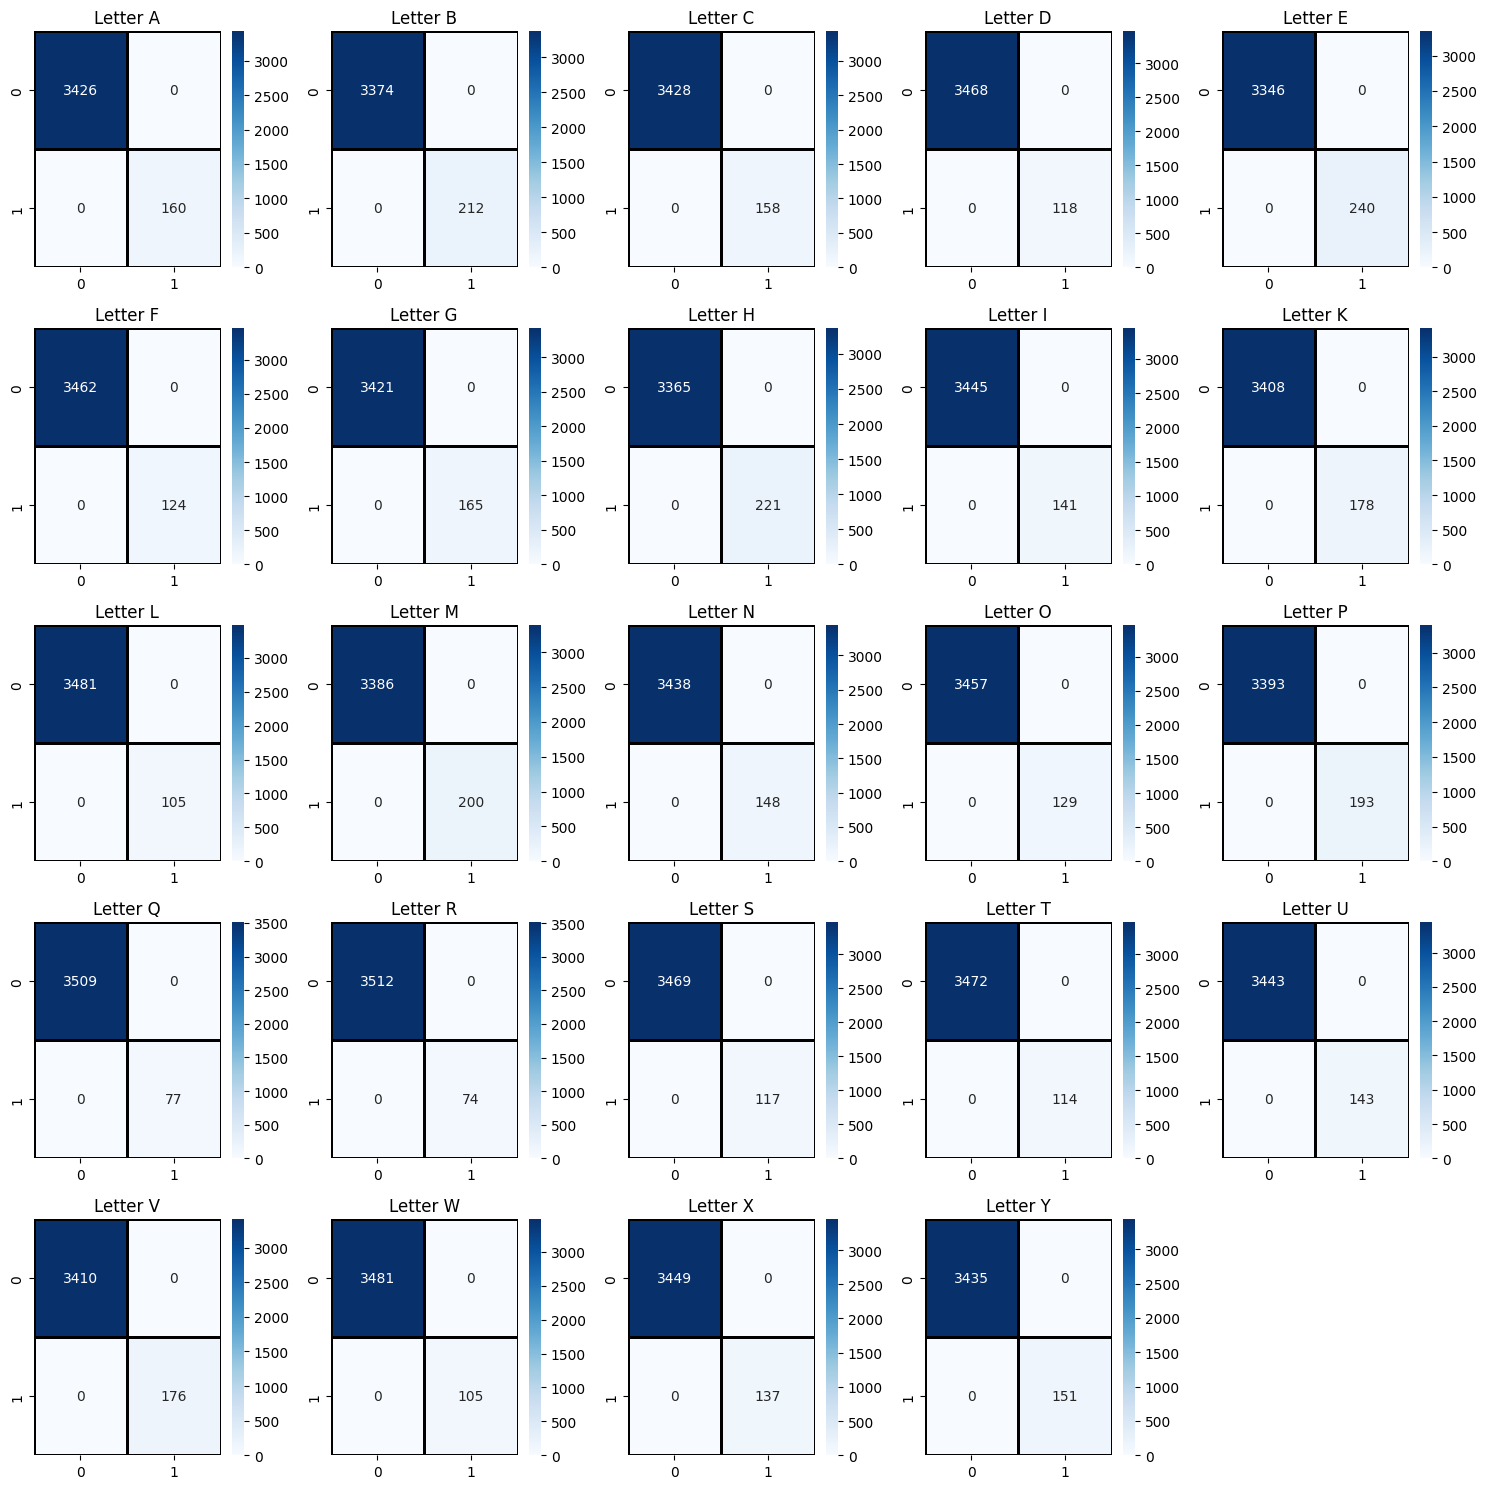

In [ ]:
# Generating the confusion matrix for each label using multilabel_confusion_matrix
model_cm = multilabel_confusion_matrix(original_test_labels, model_predicted_labels)

# Getting the number of labels
num_labels = model_cm.shape[0]

# Displaying the confusion matrix using a heatmap for each label
fig, axes = plt.subplots(nrows = num_labels // 5 + (num_labels % 5 > 0), \
                         ncols=min(num_labels, 5), figsize=(15, 15))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Iterating through each label and its corresponding confusion matrix
for i, ax in enumerate(axes):
    if i < num_labels:
        # Using the letter corresponding to the current label (from 'A' to 'Y', skipping 'J')
        ax.set_title(f"Letter {letters[i]}")  # Displaying the label as letter instead of number
        sns.heatmap(cm[i], cmap="Blues", linecolor='black', linewidth=1, \
                    annot=True, fmt='', ax=ax)
    else:  # Hiding any extra axes
        ax.set_visible(False)

# Adjusting layout and show the plot
plt.tight_layout()
plt.show()

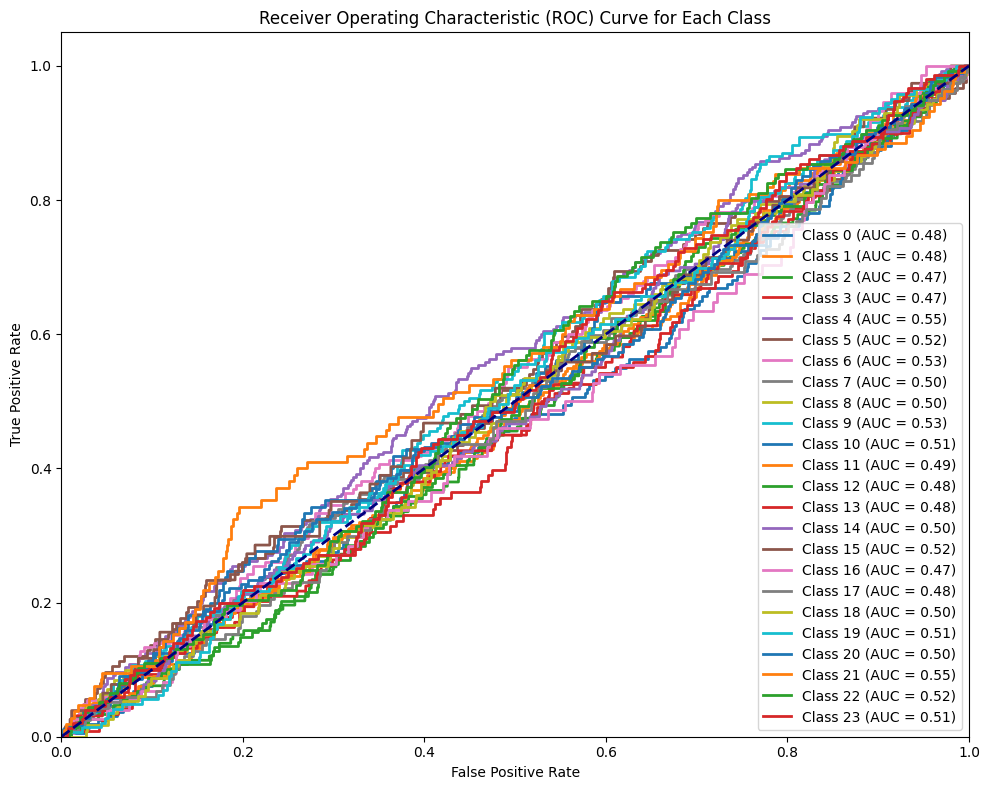

Macro-average AUC-ROC: 0.5020


In [ ]:
# Calculating ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(24):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], model_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves for each class
plt.figure(figsize = (10, 8))

# Plotting each ROC curve
for i in range(24):
    plt.plot(fpr[i], tpr[i], lw = 2, label = f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plotting the random classifier diagonal line (AUC = 0.5)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')

# Customizing plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')

# Displaying the plot
plt.tight_layout()
plt.show()

# Calculating macro-average AUC
macro_auc = np.mean(list(roc_auc.values()))
print(f"Macro-average AUC-ROC: {macro_auc:.4f}")